# Init

## Reading file

In [1]:
import pandas as pd
import numpy as np

file_name = "Models.csv"
file_name = "BestOfCartPole.csv"
df = pd.read_csv(file_name)
score_ep_min = 10
score_ep_max = 500
score_ep_stp = 10

In [2]:
df

Unnamed: 0 meta_datetime meta_git                          meta_key  \
0              0   09-03 23:45     None  8211b26ef2e2752f2009468f3624e630   
1              1   09-03 22:58     None  189eaf5295870844884e88665efbdd6e   
2              2   10-03 03:20     None  30da156ad9f417b38f9acc2615daa8c7   
3              3   09-03 21:21     None  f7c837cfc5cb32487355487bdc29765e   
4              4   09-03 13:46     None  474bd60b8a04d902f917708bae3c2958   
...          ...           ...      ...                               ...   
1235        1235   09-03 02:29     None  abfc73951e6a3b173b428f31217fabff   
1236        1236   09-03 17:29     None  1de91b8a72b62200a71928b0d3056982   
1237        1237   10-03 07:41     None  87ffd9894fbb84f8d1c24ee6f7c52e8e   
1238        1238   09-03 09:15     None  1a3c262b1bbedc73eec4522db750e214   
1239        1239   10-03 10:01     None  1cf8f7adaa15f79b0b18432d6c56d65f   

      params_batch  params_dropout  params_early_stopping  params_eps_decay  \
0              128            0.10                   True             0.999   
1              128            0.05                  False             0.995   
2               32            0.15                  False             0.995   
3              256            0.05                  False             0.999   
4               32            0.05                  False             0.995   
...            ...             ...                    ...               ...   
1235           256            0.20                  False             0.999   
1236           128            0.20                   True             0.999   
1237           128            0.20                   True             0.999   
1238            64            0.10                  False             0.995   
1239            64            0.20                   True             0.999   

      params_epsilon  params_gamma  ... scores_70_minimum  \
0                1.0         1.000  ...             40.15   
1                1.0         0.850  ...            142.44   
2                1.0         0.925  ...            124.01   
3                0.9         0.700  ...             61.08   
4                0.9         0.925  ...             11.45   
...              ...           ...  ...               ...   
1235             1.0         0.775  ...             16.08   
1236             1.0         0.850  ...             15.07   
1237             1.0         0.925  ...             97.29   
1238             1.0         0.925  ...             16.40   
1239             1.0         1.000  ...            103.75   

      scores_70_weird_metric  scores_80_average  scores_80_maximum  \
0                          1         111.540000             114.72   
1                          7         180.666667             181.58   
2                          6         200.000000             200.00   
3                          3          68.120000              70.06   
4                          0          11.600000              11.73   
...                      ...                ...                ...   
1235                       0          26.326667              26.50   
1236                       0          19.946667              20.08   
1237                       4         102.813333             106.80   
1238                       0          57.973333              58.53   
1239                       5         149.166667             153.08   

      scores_80_minimum  scores_80_weird_metric  scores_90_average  \
0                109.27                       5          79.753333   
1                176.94                       8         186.046667   
2                200.00                     440         123.893333   
3                 66.16                       3          84.466667   
4                 11.55                       0          14.986667   
...                 ...                     ...                ...   
1235              25.86                       1          26.686667  

## Getting scores

In [3]:
def get_scores(df, field="minimum"):
    if field != "minimum" and field != "maximum" and field != "average" and field != "weird_metric":
        return None
    id_values = []
    scores_values = []
    episodes_values = []
    for i in range(score_ep_min, score_ep_max + 1, score_ep_stp):
        sv = []
        ev = []
        iv = []
        id=0
        for ii in df['scores_' + str(i) + "_" + field]:
            sv.append(ii)
            ev.append(i)
            iv.append("id_" + str(id))
            id+= 1
        scores_values.append(sv)
        episodes_values.append(ev)
        id_values.append(iv)
    return (id_values, scores_values, episodes_values)


id_values, scores_values, episodes_values = get_scores(df, field="average")

## Getting x y data of scores

In [4]:
def gety_x_y_from_scores(df, field="minimum"):
    if field != "minimum" and field != "maximum" and field != "average" and field != "weird_metric":
        return None
    minl = []
    vall = []
    for i in range(score_ep_min, score_ep_max + 1, score_ep_stp):
        minl.append('scores_' + str(i) + "_" + field)
        vall.append(i)
    print(minl)
    
    x = []
    y = []
    for i in df[minl].iloc():
        y.append(i.to_list())
        x.append(vall)
    return x, y

x, y = gety_x_y_from_scores(df)#, 'average')
# df[minl]

['scores_10_minimum', 'scores_20_minimum', 'scores_30_minimum', 'scores_40_minimum', 'scores_50_minimum', 'scores_60_minimum', 'scores_70_minimum', 'scores_80_minimum', 'scores_90_minimum', 'scores_100_minimum', 'scores_110_minimum', 'scores_120_minimum', 'scores_130_minimum', 'scores_140_minimum', 'scores_150_minimum', 'scores_160_minimum', 'scores_170_minimum', 'scores_180_minimum', 'scores_190_minimum', 'scores_200_minimum', 'scores_210_minimum', 'scores_220_minimum', 'scores_230_minimum', 'scores_240_minimum', 'scores_250_minimum', 'scores_260_minimum', 'scores_270_minimum', 'scores_280_minimum', 'scores_290_minimum', 'scores_300_minimum', 'scores_310_minimum', 'scores_320_minimum', 'scores_330_minimum', 'scores_340_minimum', 'scores_350_minimum', 'scores_360_minimum', 'scores_370_minimum', 'scores_380_minimum', 'scores_390_minimum', 'scores_400_minimum', 'scores_410_minimum', 'scores_420_minimum', 'scores_430_minimum', 'scores_440_minimum', 'scores_450_minimum', 'scores_460_minimu

In [24]:
def get_scores_labels(df, field="minimum"):
    if field != "minimum" and field != "maximum" and field != "average" and field != "weird_metric":
        return None
    minl = []
    for i in range(score_ep_min, score_ep_max + 1, score_ep_stp):
        minl.append('scores_' + str(i) + "_" + field)
#     print(minl)
    return minl
# get_scores_labels(df)

# Early DataViz

## Abstract art:

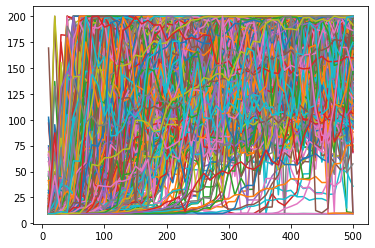

In [5]:
import seaborn as sn

for xx, yy in zip(x, y):
    sn.lineplot(x=xx, y=yy)


## Individual curves

In [6]:
from IPython.display import display
import matplotlib.pyplot as plt

def print_sim(labels, x, y, id):
    plt.clf()
    nb = 0
    for i in range(len(labels)):
        if labels[i] == id:
            hmm = sn.lineplot(x=x[i], y=y[i])
            nb += 1
    print("\t Group of " + str(nb) + " element(s)")
#     plt.savefig('Pictures/output_' + str(id) + '.png')
    display(hmm)
    plt.pause(0.05)

def print_plot(x, y, i):
    plt.clf()
    hmm = sn.lineplot(x=x[i], y=y[i])
    display(hmm)
    plt.pause(0.05)



In [7]:
def instability_val(scores, times, step=1):
    instability = []
    id = 0
    for score, time in zip(scores, times):
        val = 0
        for i in range(step, len(score)):
            tmp = score[i] - score[i - step]
            if tmp < 0:
                val += tmp
        instability.append([score, time, val, id])
        id += 1
    return instability

instability = instability_val(y, x)

instability.sort(key=lambda x: x[2], reverse=True)

x_ = [x[1] for x in instability]
y_ = [x[0] for x in instability]
i_ = [x[3] for x in instability]

Curve n*1160


<AxesSubplot:>

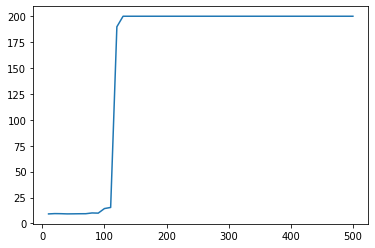

Curve n*737


<AxesSubplot:>

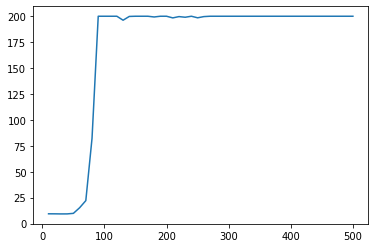

Curve n*721


<AxesSubplot:>

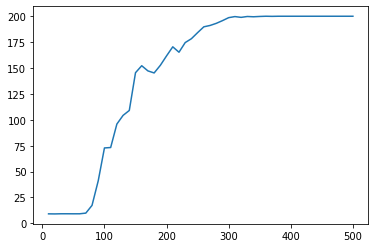

Curve n*560


<AxesSubplot:>

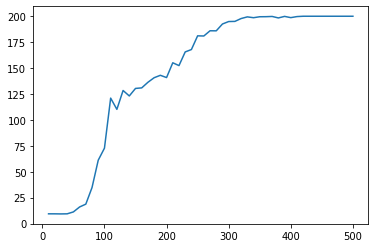

Curve n*566


<AxesSubplot:>

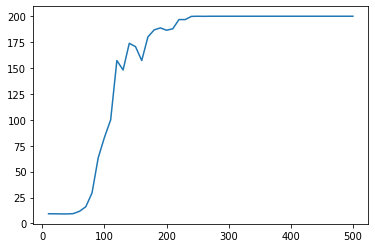

Curve n*535


<AxesSubplot:>

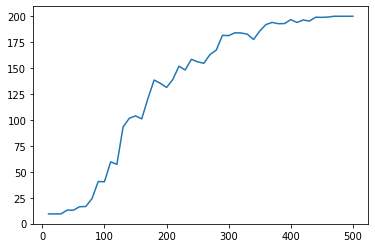

Curve n*519


<AxesSubplot:>

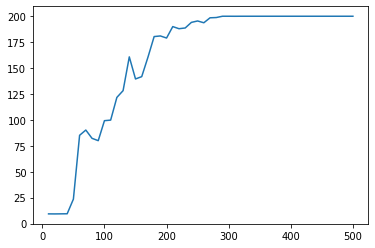

Curve n*837


<AxesSubplot:>

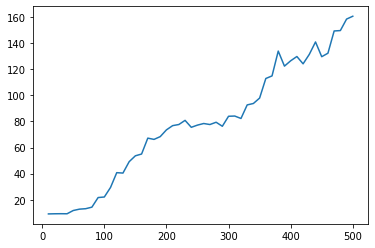

Curve n*818


<AxesSubplot:>

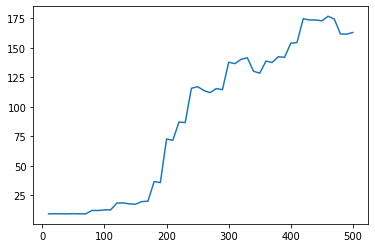

Curve n*411


<AxesSubplot:>

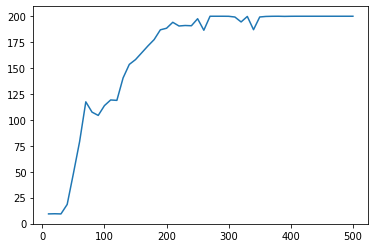

Curve n*235


<AxesSubplot:>

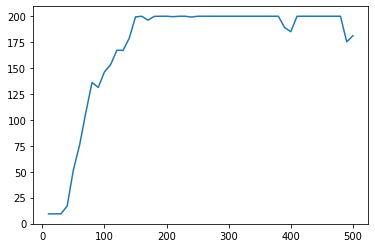

Curve n*757


<AxesSubplot:>

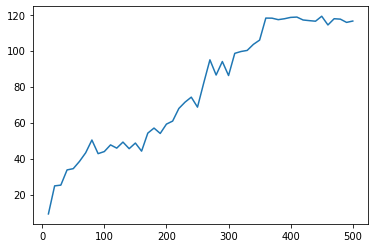

Curve n*1171


<AxesSubplot:>

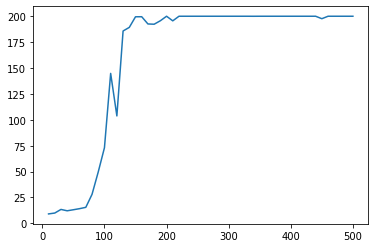

Curve n*70


<AxesSubplot:>

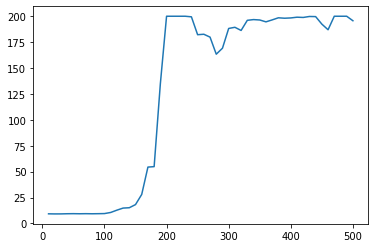

Curve n*45


<AxesSubplot:>

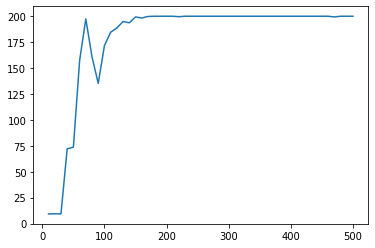

Curve n*1032


<AxesSubplot:>

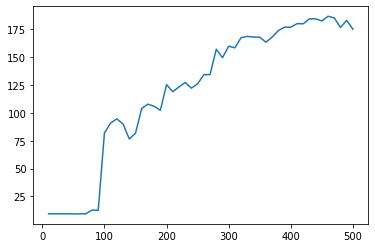

Curve n*294


<AxesSubplot:>

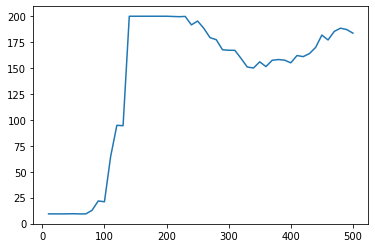

Curve n*1149


<AxesSubplot:>

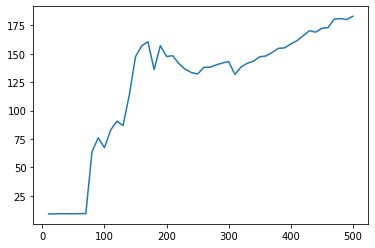

Curve n*1234


<AxesSubplot:>

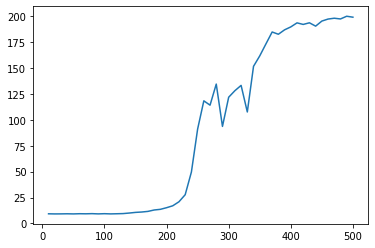

Curve n*433


<AxesSubplot:>

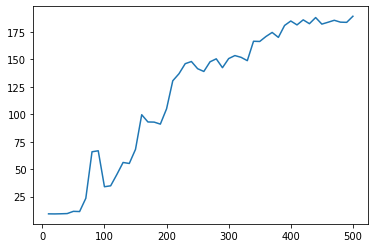

Curve n*595


<AxesSubplot:>

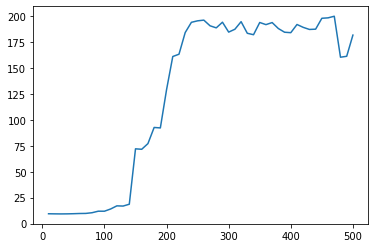

Curve n*201


<AxesSubplot:>

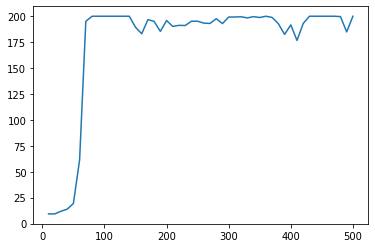

Curve n*189


<AxesSubplot:>

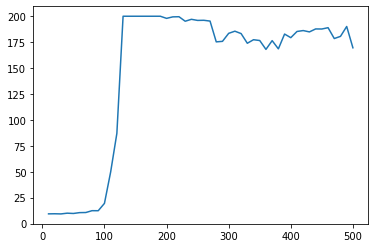

Curve n*1117


<AxesSubplot:>

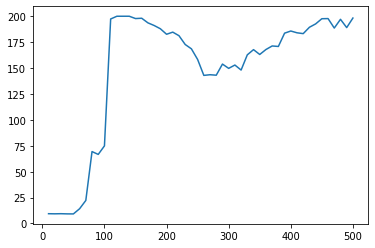

Curve n*349


<AxesSubplot:>

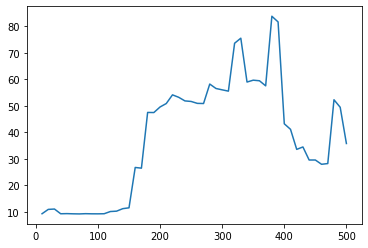

Curve n*756


<AxesSubplot:>

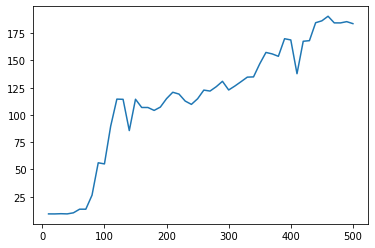

Curve n*95


<AxesSubplot:>

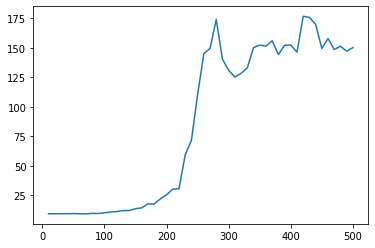

Curve n*844


<AxesSubplot:>

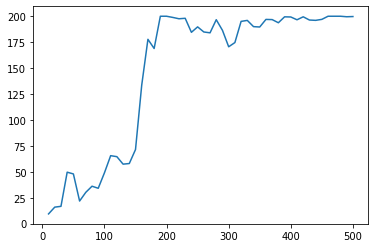

Curve n*1021


<AxesSubplot:>

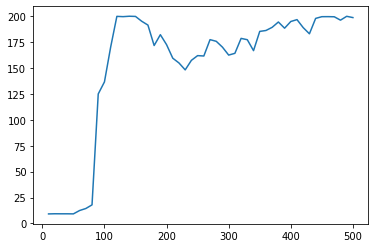

Curve n*224


<AxesSubplot:>

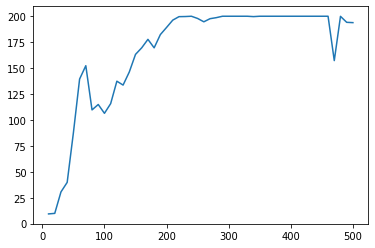

Curve n*1026


<AxesSubplot:>

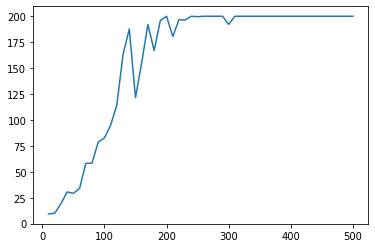

Curve n*176


<AxesSubplot:>

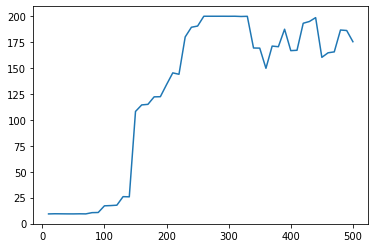

Curve n*485


<AxesSubplot:>

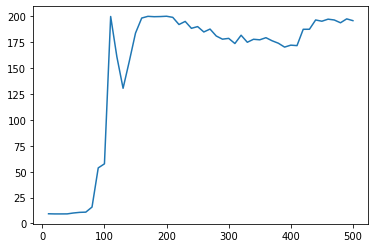

Curve n*127


<AxesSubplot:>

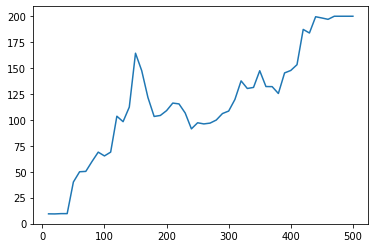

Curve n*1028


<AxesSubplot:>

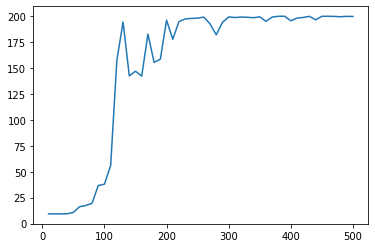

Curve n*616


<AxesSubplot:>

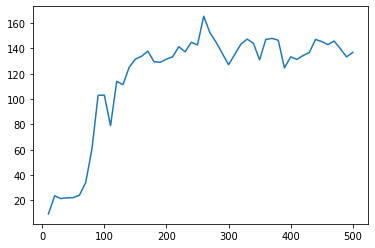

Curve n*550


<AxesSubplot:>

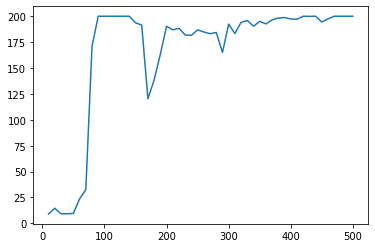

Curve n*810


<AxesSubplot:>

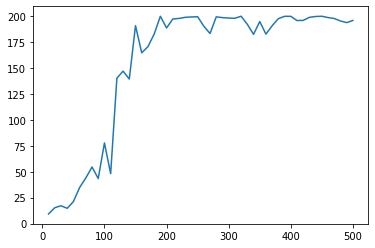

Curve n*145


<AxesSubplot:>

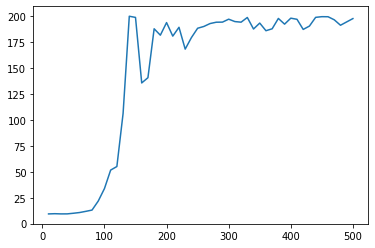

Curve n*568


<AxesSubplot:>

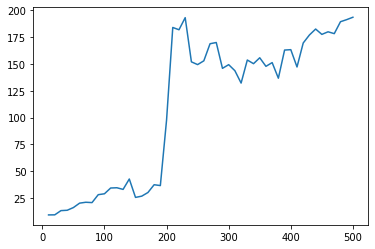

Curve n*803


<AxesSubplot:>

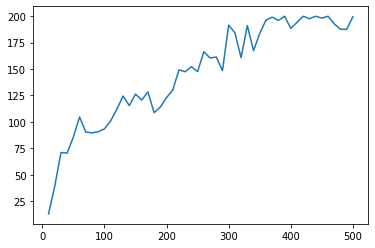

Curve n*908


<AxesSubplot:>

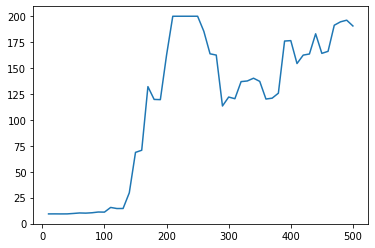

Curve n*483


<AxesSubplot:>

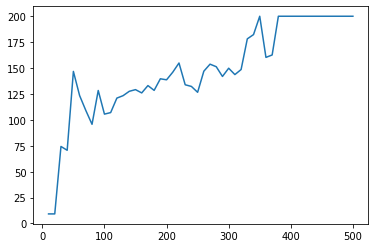

Curve n*79


<AxesSubplot:>

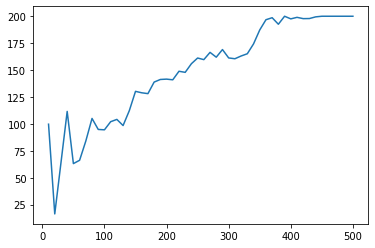

Curve n*121


<AxesSubplot:>

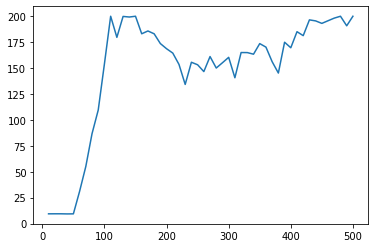

Curve n*162


<AxesSubplot:>

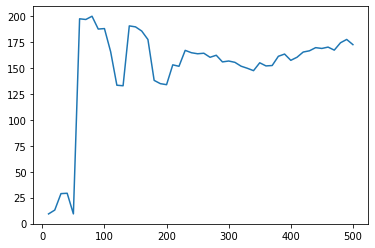

Curve n*304


<AxesSubplot:>

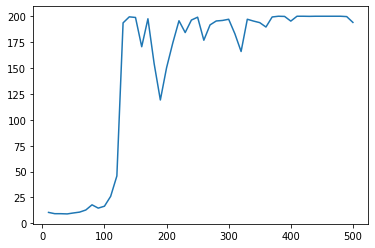

Curve n*381


<AxesSubplot:>

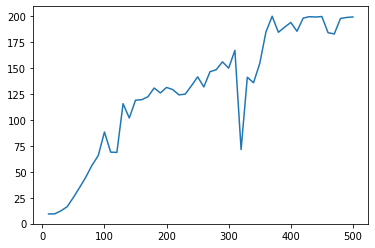

Curve n*870


<AxesSubplot:>

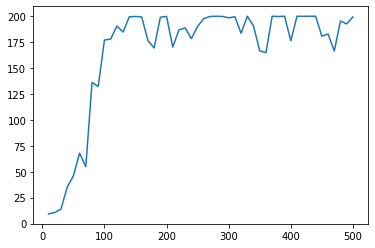

Curve n*1030


<AxesSubplot:>

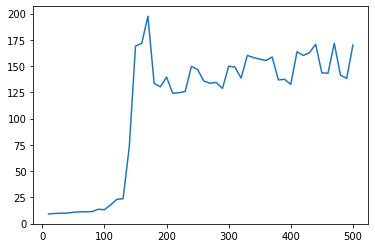

Curve n*391


<AxesSubplot:>

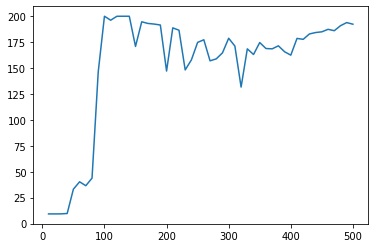

Curve n*545


<AxesSubplot:>

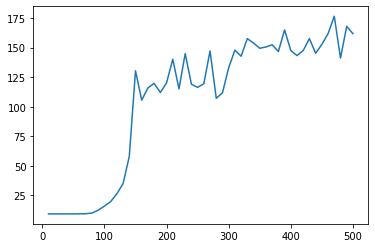

Curve n*271


<AxesSubplot:>

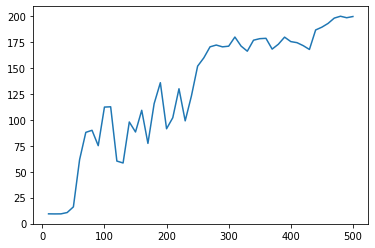

Curve n*195


<AxesSubplot:>

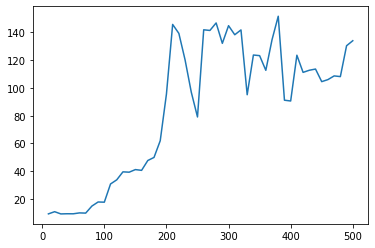

Curve n*50


<AxesSubplot:>

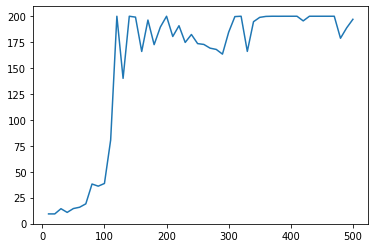

Curve n*248


<AxesSubplot:>

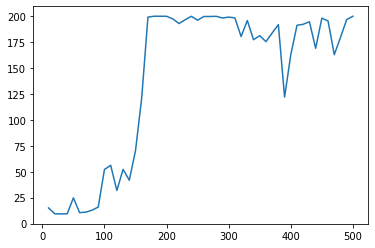

Curve n*1074


<AxesSubplot:>

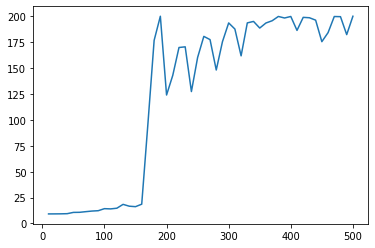

Curve n*34


<AxesSubplot:>

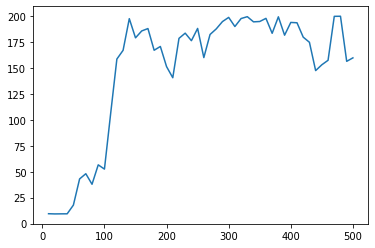

Curve n*2


<AxesSubplot:>

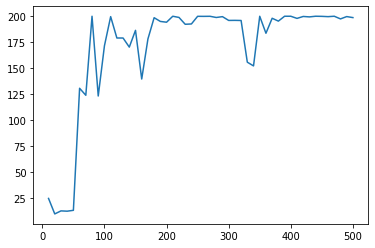

Curve n*747


<AxesSubplot:>

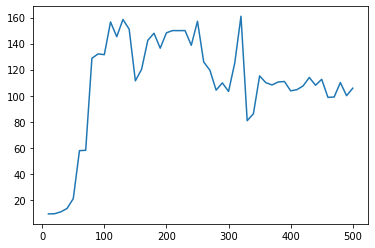

Curve n*708


<AxesSubplot:>

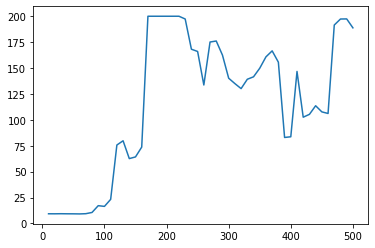

Curve n*43


<AxesSubplot:>

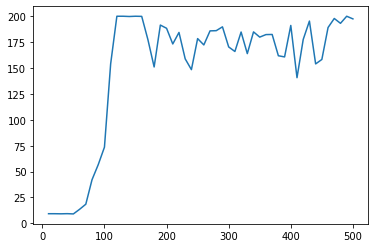

Curve n*1110


<AxesSubplot:>

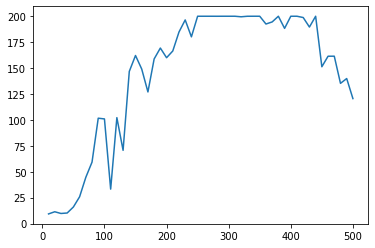

Curve n*1043


<AxesSubplot:>

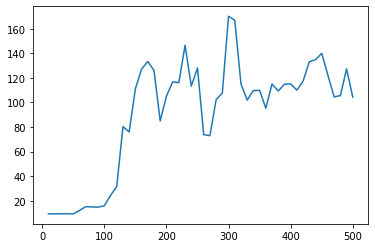

Curve n*704


<AxesSubplot:>

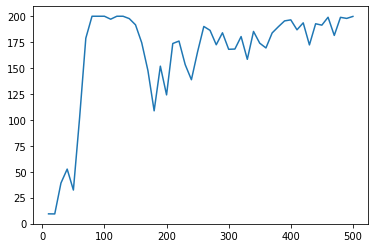

Curve n*590


<AxesSubplot:>

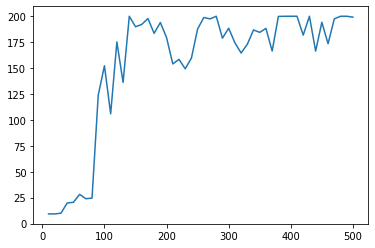

Curve n*635


<AxesSubplot:>

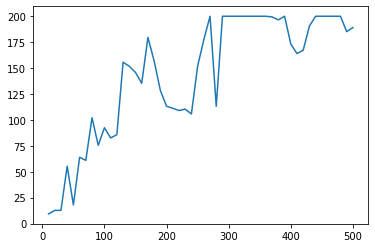

Curve n*27


<AxesSubplot:>

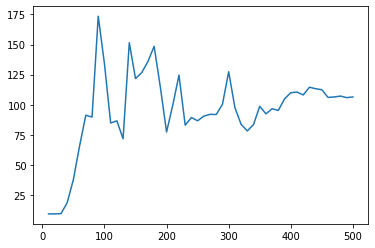

Curve n*517


<AxesSubplot:>

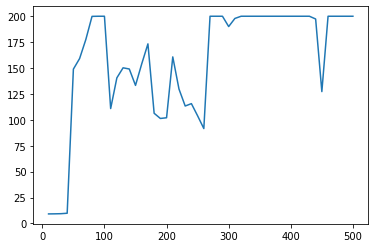

Curve n*943


<AxesSubplot:>

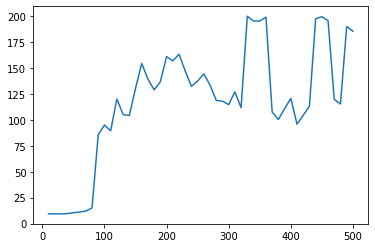

Curve n*292


<AxesSubplot:>

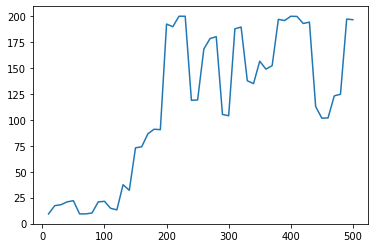

Curve n*269


<AxesSubplot:>

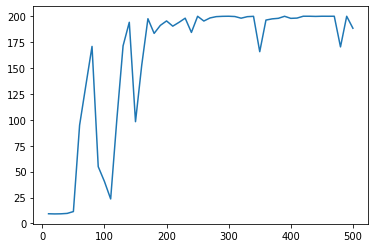

Curve n*299


<AxesSubplot:>

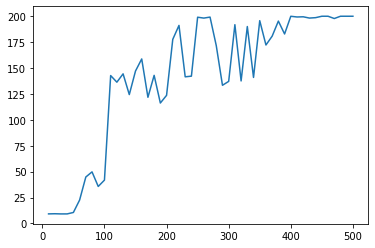

Curve n*659


<AxesSubplot:>

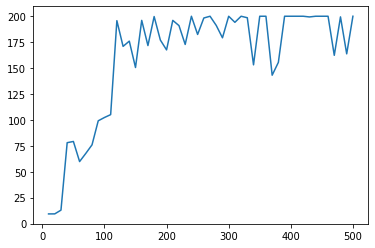

Curve n*439


<AxesSubplot:>

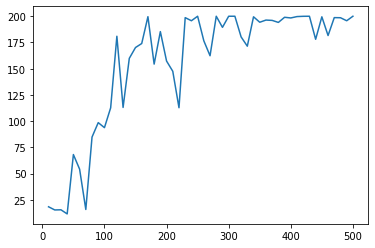

Curve n*1220


<AxesSubplot:>

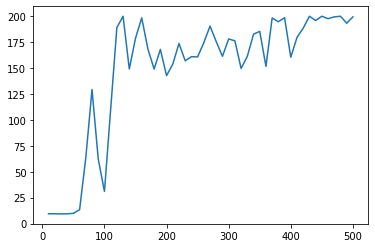

Curve n*709


<AxesSubplot:>

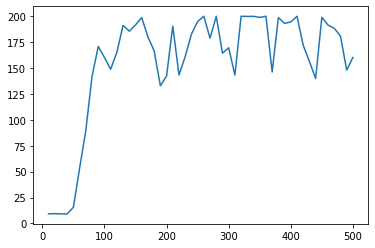

Curve n*817


<AxesSubplot:>

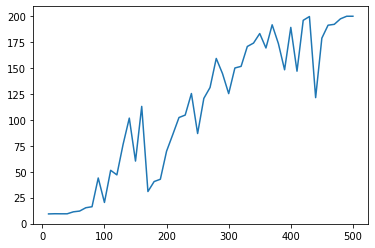

Curve n*819


<AxesSubplot:>

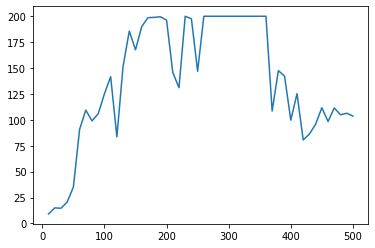

Curve n*557


<AxesSubplot:>

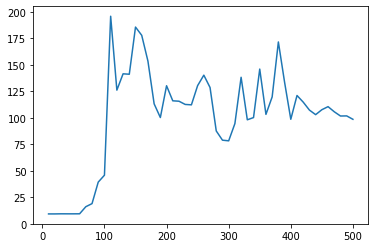

Curve n*1226


<AxesSubplot:>

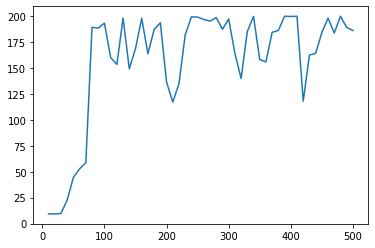

Curve n*255


<AxesSubplot:>

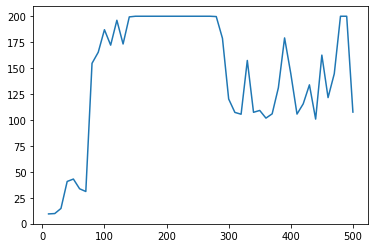

Curve n*641


<AxesSubplot:>

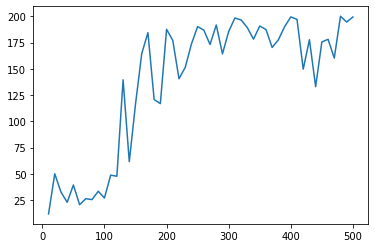

Curve n*494


<AxesSubplot:>

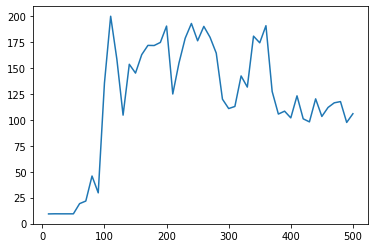

Curve n*612


<AxesSubplot:>

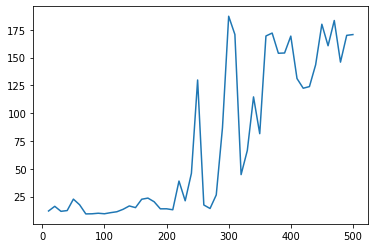

Curve n*246


<AxesSubplot:>

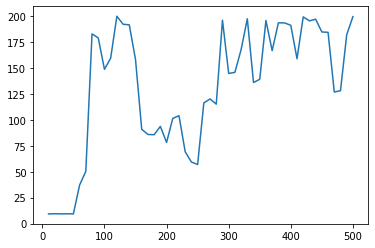

Curve n*1197


<AxesSubplot:>

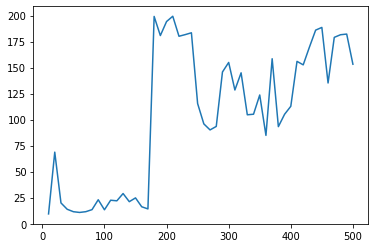

Curve n*351


<AxesSubplot:>

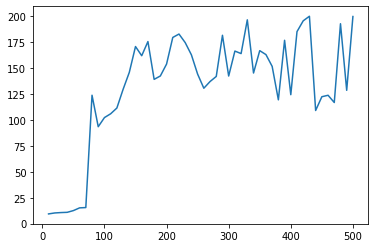

Curve n*423


<AxesSubplot:>

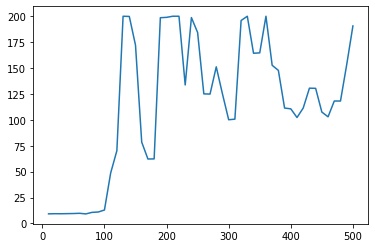

Curve n*28


<AxesSubplot:>

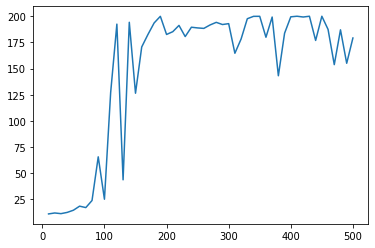

Curve n*520


<AxesSubplot:>

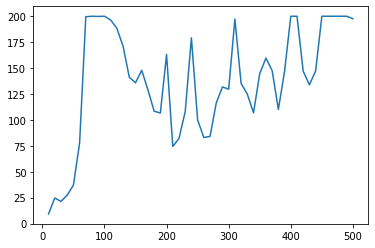

Curve n*56


<AxesSubplot:>

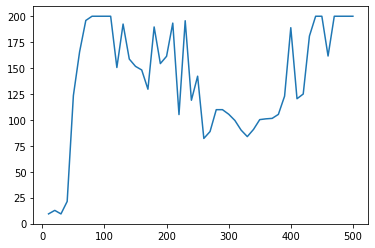

Curve n*738


<AxesSubplot:>

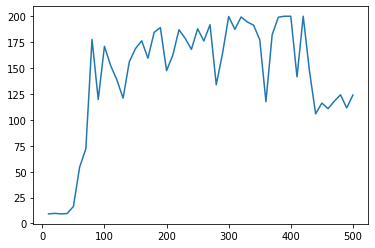

Curve n*311


<AxesSubplot:>

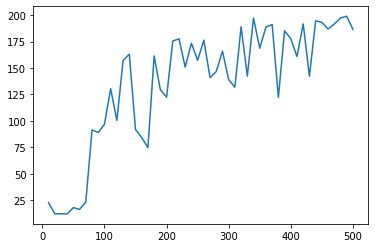

Curve n*976


<AxesSubplot:>

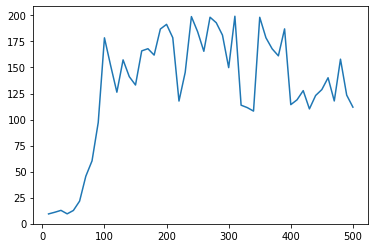

Curve n*543


<AxesSubplot:>

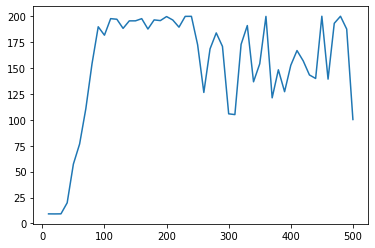

Curve n*514


<AxesSubplot:>

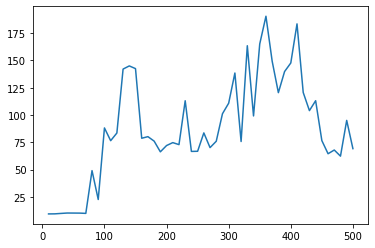

Curve n*1182


<AxesSubplot:>

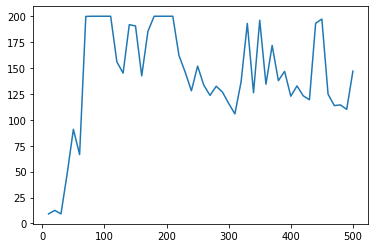

Curve n*324


<AxesSubplot:>

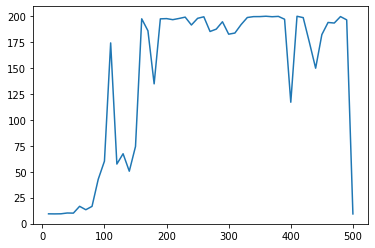

Curve n*774


<AxesSubplot:>

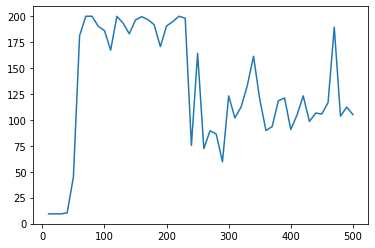

Curve n*787


<AxesSubplot:>

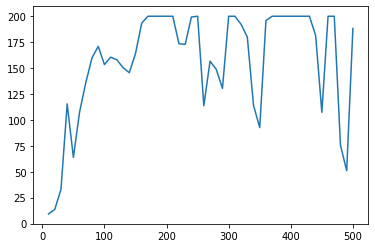

Curve n*287


<AxesSubplot:>

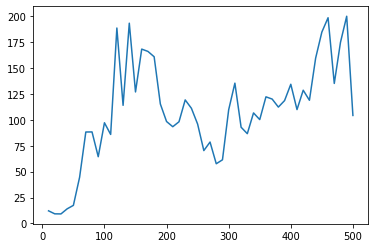

Curve n*853


<AxesSubplot:>

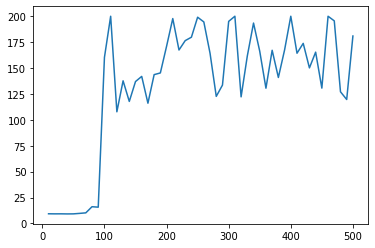

Curve n*427


<AxesSubplot:>

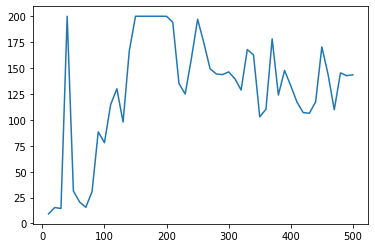

Curve n*953


<AxesSubplot:>

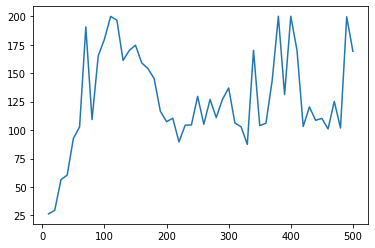

Curve n*118


<AxesSubplot:>

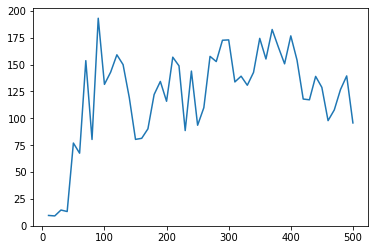

Curve n*686


<AxesSubplot:>

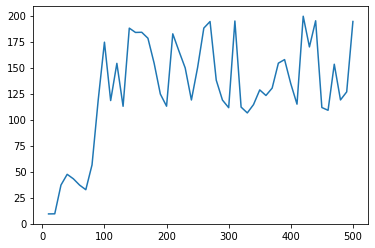

Curve n*115


<AxesSubplot:>

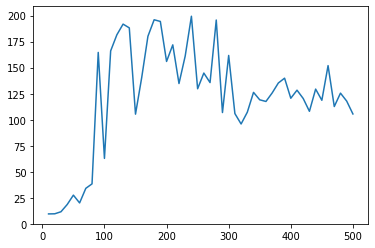

Curve n*378


<AxesSubplot:>

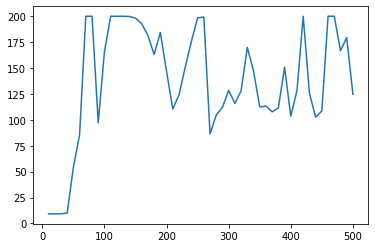

Curve n*146


<AxesSubplot:>

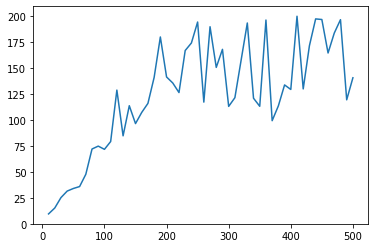

Curve n*548


<AxesSubplot:>

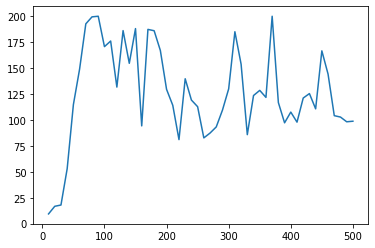

Curve n*415


<AxesSubplot:>

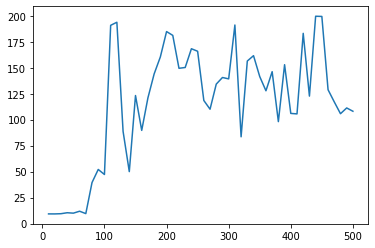

In [9]:
for i in range(len(x_) // 11):
    print("Curve n*" + str(i_[i * 10]))
    print_plot(x_, y_, i * 10)

## Information from chaos, thanks to clustering

### Similarity measure
1. Clustering from similarity measures offers pretty homogenous groups, but does not yet help for chaos/instability understanding
    1. PCM
    2. Discrete Frechet distance ++
    3. area between two curves
    4. Curve Length based similarity measure
    5. Dynamic Time Warping distance ++

In [ ]:
import sys  
!{sys.executable} -m pip install --user similaritymeasures

In [10]:
import numpy as np
import similaritymeasures

def curve_similiraty(exp_data, num_data, nb=1):
    everything = False
    pcm = 1
    df = 1
    area = 1
    cl =1
    dtw = 1
    
    if nb == 0 or everything:
        # quantify the difference between the two curves using PCM
        pcm = similaritymeasures.pcm(exp_data, num_data)

    if nb == 1 or everything:
        # quantify the difference between the two curves using
        # Discrete Frechet distance
        df = similaritymeasures.frechet_dist(exp_data, num_data)

    if nb == 2 or everything:
        # quantify the difference between the two curves using
        # area between two curves
        area = similaritymeasures.area_between_two_curves(exp_data, num_data)

    if nb == 3 or everything:
        # quantify the difference between the two curves using
        # Curve Length based similarity measure
        cl = similaritymeasures.curve_length_measure(exp_data, num_data)

    if nb == 4 or everything:
        # quantify the difference between the two curves using
        # Dynamic Time Warping distance
        dtw, d = similaritymeasures.dtw(exp_data, num_data)
    
    ret = [pcm, df, area, cl, dtw]

    return ret[nb]


In [11]:
def compare_id(x, y, a, b, sim_measure=1):
    data_size = 50
    # Generate random experimental data
    exp_data = np.zeros((data_size, 2))
    exp_data[:, 0] = x[a]
    exp_data[:, 1] = y[a]

    # Generate random numerical data
    num_data = np.zeros((data_size, 2))
    num_data[:, 0] = x[b]
    num_data[:, 1] = y[b]

    return curve_similiraty(exp_data, num_data, nb=sim_measure)

test = False
# test = True

if test:
    compare_id(x, y, 24, 25)
    compare_id(x, y, 24, 22)
    compare_id(x, y, 25, 22)

In [ ]:
import sys  
!{sys.executable} -m pip install --user tqdm

In [12]:
from tqdm import tqdm

def get_cov_mat_sim(x, y, sim=1):
    size = len(x)

    cov_mat = []

    with tqdm(range(size), desc="Cov Mat <3 ", unit="line") as tep:
        for i in tep:
            lin_mat = []
            for ii in range(size):
                ret = compare_id(x, y, i, ii, sim)
                if ret == 0:
                    ret += 1e-25
                lin_mat.append(ret)
            cov_mat.append(lin_mat)
            
    return cov_mat

# c_m = get_cov_mat_sim(x, y)

### Clustering

In [13]:
import numpy as np
import math as mt
import sys
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics

class XMeans:
    def loglikelihood(self, r, rn, var, m, k):
        l1 = - rn / 2.0 * mt.log(2 * mt.pi)
        l2 = - rn * m / 2.0 * mt.log(var + 1e-20)
        l3 = - (rn - k) / 2.0
        l4 = rn * mt.log(rn)
        l5 = - rn * mt.log(r)

        return l1 + l2 + l3 + l4 + l5

    def __init__(self, X, kmax = 20):
        self.X = X
        self.num = np.size(self.X, axis=0)
        self.dim = np.size(X, axis=1)
        self.KMax = kmax

    def fit(self):
        k = 1
        X = self.X
        M = self.dim
        num = self.num

        while(1):
            print("K is: ", k)
            ok = k

            #Improve Params
            kmeans = KMeans(n_clusters=k).fit(X)
            labels = kmeans.labels_
            m = kmeans.cluster_centers_

            #Improve Structure
            #Calculate BIC
            p = M + 1

            obic = np.zeros(k)

            for i in range(k):
                rn = np.size(np.where(labels == i))
                var = np.sum((X[labels == i] - m[i])**2)/float(rn - 1 + 1e-25)
                obic[i] = self.loglikelihood(rn, rn, var, M, 1) - p/2.0*mt.log(rn)

            #Split each cluster into two subclusters and calculate BIC of each splitted cluster
            sk = 2 #The number of subclusters
            nbic = np.zeros(k)
            addk = 0

            for i in range(k):
                ci = X[labels == i]
                r = np.size(np.where(labels == i))

                print("Sk is: ", sk)
#                 print("Ci: ", ci)
                if ci.shape[0] < sk:
                    continue
                kmeans = KMeans(n_clusters=sk).fit(ci)
                ci_labels = kmeans.labels_
                sm = kmeans.cluster_centers_

                for l in range(sk):
                    rn = np.size(np.where(ci_labels == l))
                    var = np.sum((ci[ci_labels == l] - sm[l])**2)/float(rn - sk + 1e-25)
                    nbic[i] += self.loglikelihood(r, rn, var, M, sk)

                p = sk * (M + 1)
                nbic[i] -= p/2.0*mt.log(r)

                if obic[i] < nbic[i]:
                    addk += 1

            k += addk

            if ok == k or k >= self.KMax:
                break


        #Calculate labels and centroids
        kmeans = KMeans(n_clusters=k).fit(X)
        self.labels = kmeans.labels_
        self.k = k
        self.m = kmeans.cluster_centers_

Similarity measures:

    0. **PCM**
    1. **Discrete Frechet distance**
    2. **area between two curves**
    3. **Curve Length based similarity measure**
    4. **Dynamic Time Warping distance**

In [14]:
from sklearn.cluster import KMeans

def show_clusters(x, y, labels):
    s = max(labels)
    for i in range(s):
        print("Cluster " + str(i + 1) + " / " + str(s) + ":", end="")
        print_sim(labels, x, y, i)


        
def sim_from_data(x, y, similarity_measure=1, c_m=None, nb_clusters=None):
    if c_m == None:
        c_m = get_cov_mat_sim(x, y, sim=similarity_measure)
    X = np.array(c_m)
    if nb_clusters == None:
        xm = XMeans(X)
        xm.fit()
        show_clusters(x, y, xm.labels)
        return xm.labels
    else:
        kmeans = KMeans(n_clusters=nb_clusters, random_state=0).fit(X)
        show_clusters(x, y, kmeans.labels_)
        return kmeans.labels_


### Data viz of the different similarity measurements

In [ ]:
similarity_measure = 4
c_m = get_cov_mat_sim(x, y, sim=similarity_measure)

Cov Mat <3 : 100%|██████████| 1240/1240 [1:15:31<00:00,  3.65s/line]


Cluster 1 / 12:	 Group of 94 element(s)


<AxesSubplot:>

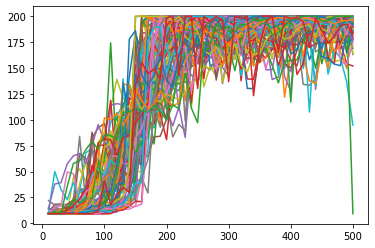

Cluster 2 / 12:	 Group of 134 element(s)


<AxesSubplot:>

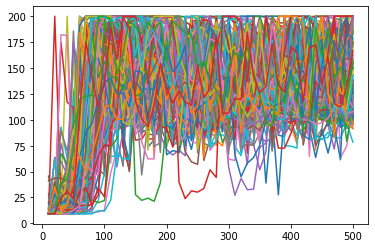

Cluster 3 / 12:	 Group of 20 element(s)


<AxesSubplot:>

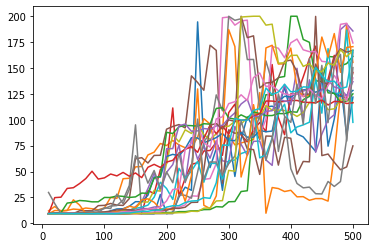

Cluster 4 / 12:	 Group of 14 element(s)


<AxesSubplot:>

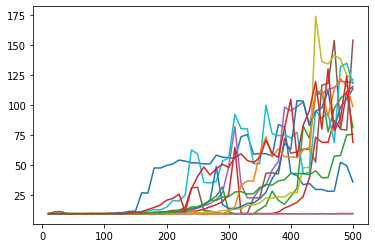

Cluster 5 / 12:	 Group of 114 element(s)


<AxesSubplot:>

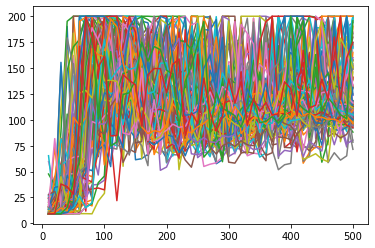

Cluster 6 / 12:	 Group of 106 element(s)


<AxesSubplot:>

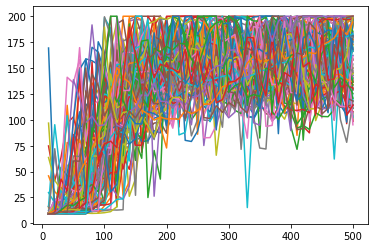

Cluster 7 / 12:	 Group of 125 element(s)


<AxesSubplot:>

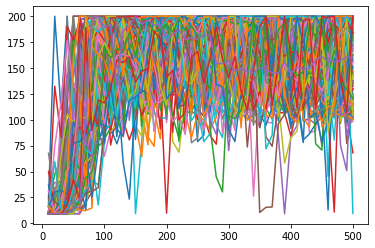

Cluster 8 / 12:	 Group of 166 element(s)


<AxesSubplot:>

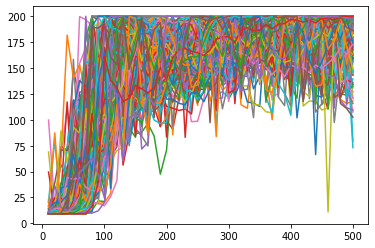

Cluster 9 / 12:	 Group of 55 element(s)


<AxesSubplot:>

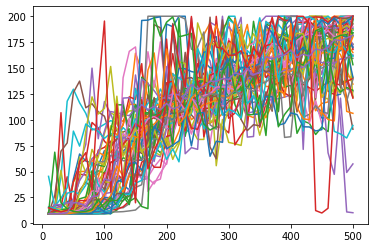

Cluster 10 / 12:	 Group of 202 element(s)


<AxesSubplot:>

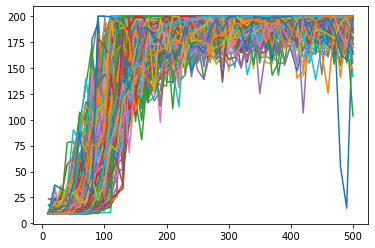

Cluster 11 / 12:	 Group of 124 element(s)


<AxesSubplot:>

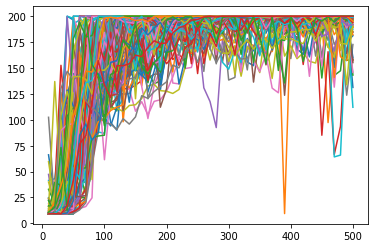

Cluster 12 / 12:	 Group of 46 element(s)


<AxesSubplot:>

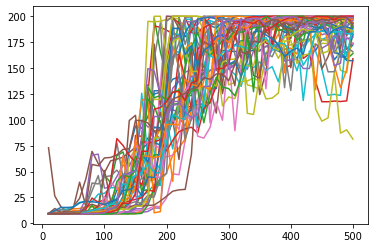

[ 4  4 10 ...  5 11  5]


In [15]:
clusters_labels = sim_from_data(x, y, c_m=c_m, similarity_measure=similarity_measure, nb_clusters=13)
print(clusters_labels)

In [ ]:
def get_groups_indexs(labels, groups):
    good_group_indexs = []
    for i in range(len(labels)):
        if labels[i] in groups:
            good_group_indexs.append(i)
    print("Labels: ", labels)
    print("Group asked: ", groups)
    print("Selected indexes: ", len(good_group_indexs), ": ", good_group_indexs)    
    return good_group_indexs
good_group_indexs = get_groups_indexs(clusters_labels, [1, 4, 5, 9])

# Feature Engineering

How to measure chaos and instability during the learning process ?

As so to predict which parameters reduces them in Reinforcement Learning

1. Creation of a viariable to measure how much the model regressed:
    1. negative_progress: Sum of all negative differences between x(i - step) - x(i)
    2. last_combo: Start of the last row of values beyond treshold
    3. best_combo: Longest row of values beyond treshold
2. Prediction of correlated Parameters with each var:
    1. Variables:
        1. Best score
        2. negative_progress
        3. len_last_combo    
        4. longest_combo
    2. Algorithms
        1. Random Forest
        2. CART regression
        3. XGBoost

## Variables and functions declaration

In [25]:
scores_labels_min = get_scores_labels(df)

print(scores_labels_min)

scores_labels_weird = [i.replace("minimum", "weird_metric") for i in scores_labels_min]


['scores_10_minimum', 'scores_20_minimum', 'scores_30_minimum', 'scores_40_minimum', 'scores_50_minimum', 'scores_60_minimum', 'scores_70_minimum', 'scores_80_minimum', 'scores_90_minimum', 'scores_100_minimum', 'scores_110_minimum', 'scores_120_minimum', 'scores_130_minimum', 'scores_140_minimum', 'scores_150_minimum', 'scores_160_minimum', 'scores_170_minimum', 'scores_180_minimum', 'scores_190_minimum', 'scores_200_minimum', 'scores_210_minimum', 'scores_220_minimum', 'scores_230_minimum', 'scores_240_minimum', 'scores_250_minimum', 'scores_260_minimum', 'scores_270_minimum', 'scores_280_minimum', 'scores_290_minimum', 'scores_300_minimum', 'scores_310_minimum', 'scores_320_minimum', 'scores_330_minimum', 'scores_340_minimum', 'scores_350_minimum', 'scores_360_minimum', 'scores_370_minimum', 'scores_380_minimum', 'scores_390_minimum', 'scores_400_minimum', 'scores_410_minimum', 'scores_420_minimum', 'scores_430_minimum', 'scores_440_minimum', 'scores_450_minimum', 'scores_460_minimu

In [47]:
# So i can print all the columns
pd.options.display.max_columns = None

## Feature creation

What need to be pred:

1. **How soon did the model took off**:
    1. Should be deductible by **best_score**, which comes from weird_metric
2. **How stable/chaotic learning is**:
    1. **Longest combo** of passed tests
    2. **Len last combo** of passed test
    3. How much **regression** had model

### best_score

**How soon did the model took off**:

Should be deductible by **best_score**, which comes from weird_metric

 1. \+ Better value definitely means a better model, in means of performance/early-take-off
 2. \- The difference in itself does not mean a lot, and might become a bias

In [26]:
df['best_score'] = df[scores_labels_weird].max(axis=1)

In [48]:
tmp_df = df.sort_values('best_score', ascending=False)
tmp_df.head(20)

Unnamed: 0 meta_datetime meta_git                          meta_key  \
395         395   10-03 02:38     None  b868525bab355d75cf68bbb6cee23661   
528         528   09-03 10:08     None  b59b7d5acbb57e285b1f7b645a8bfbcc   
693         693   10-03 07:57     None  f97aa48146dbbf9466cef6f950b1d61d   
143         143   09-03 18:53     None  5a148cf59014a3548515fa15f54e1458   
427         427   09-03 20:05     None  108974926c2f698c5780ab76c0f45da8   
177         177   10-03 03:27     None  8028ecc396b04ab658f50a75d4fa7121   
766         766   09-03 13:19     None  36e5de786b6ef2577677332358e65f22   
578         578   09-03 22:12     None  a2ce0166f215a5a12797b36998fdf504   
216         216   09-03 15:09     None  bcb4becd0b665900398fa5319325246c   
790         790   10-03 05:06     None  b9ad04b942bb2f3340d58f1c18af5f1d   
399         399   09-03 05:24     None  51914c8d47743fc2fe5b866753a305c7   
491         491   09-03 23:39     None  cc4f1062bba3e5b8bd00a0f439372293   
237         237   10-03 07:10     None  e0a0fcdf27b916e8219190efd950acc0   
164         164   10-03 12:38     None  df3045ec695a54751f29f6b5b1f3f0a3   
169         169   10-03 02:26     None  2476c71859df6d7377491c1c0c4a4cf1   
150         150   09-03 01:35     None  061fa2e3f2798ec5d02bfc39de4f1434   
455         455   10-03 05:00     None  6508b1bd7b55b8940f1462ee858d6a20   
447         447   09-03 20:05     None  2a1c58662071ef4e4343c5be02ff780d   
804         804   10-03 10:25     None  656af7756dbf68f8f2c897911c5ffa6a   
416         416   09-03 21:59     None  d11ec85bb0638339c481a72b6736f4a3   

     params_batch  params_dropout  params_early_stopping  params_eps_decay  \
395           256            0.15                   True             0.999   
528            64            0.25                  False             0.999   
693           128            0.20                   True             0.999   
143           128            0.20                  False             0.995   
427           256            0.20                   True             0.999   
177           128            0.05                   True             0.999   
766            32            0.10                  False             0.999   
578            64            0.10                  False             0.999   
216           256            0.20                   True             0.999   
790           256            0.20                  False             0.999   
399           256            0.10                   True             0.995   
491           256            0.20                  False             0.999   
237            64            0.20                   True             0.995   
164           256            0.20                   True             0.999   
169           128            0.05                   True             0.999   
150           256            0.20                  False             0.995   
455           256            0.20                   True             0.999   
447           128            0.20                   True             0.999   
804            64            0.20                   True             0.995   
416           128            0.05                   True             0.999   

     params_epsilon  params_gamma  params_learning_rate  params_max_turns  \
395             1.0         0.925                0.0050              1000   
528             0.9         1.000                0.0050              1500   
693             0.9         0.775                0.0010              1000   
143             1.0         0.925                0.0050               750   
427             1.0         0.775                0.0050               750   
177             1.0         0.850                0.0050              1000   
766             0.9         0.925                0.0005              1000   
578             1.0         1.000                0.0050              1500   
216             1.0         1.000                0.0050               500   

### negative_progress

**How stable/chaotic learning is**:
 
How much **regression** had model

 1. \+ Small values definitively shows a model wich did not unlearn
 2. \- It's not relative to the performance, small values might still be a bad model
 3. \- Regression might happen in the early stage, before the model is able to pass the evaluation. I'm unsure if this is a bad thing

In [27]:
def instability_val(scores, times, step=1):
    instability = []
    id = 0
    for score, time in zip(scores, times):
        val = 0
        for i in range(step, len(score)):
            tmp = score[i] - score[i - step]
            if tmp < 0:
                val += tmp
        instability.append([score, time, val, id])
        id += 1
    return instability

instability = instability_val(y, x)
# inst_val = [[i[2], i[3]] for i in instability]
negative_progress = [i[2] for i in instability]
negative_progress = np.array(negative_progress)
df['negative_progress'] = negative_progress
df['negative_progress']

0      -650.26
1      -621.40
2      -260.83
3      -472.75
4      -144.38
         ...  
1235    -60.27
1236   -391.77
1237   -197.43
1238    -47.92
1239   -529.74
Name: negative_progress, Length: 1240, dtype: float64

In [44]:
tmp_df = df.sort_values('negative_progress', ascending=False)
tmp_df.head(20)

Unnamed: 0 meta_datetime meta_git                          meta_key  \
1160        1160   09-03 02:47     None  a6cedd9964b0f0f74db6ab12ed9634a3   
1073        1073   10-03 03:07     None  08ca422fa140bfe2682f67be1fcaa73e   
435          435   10-03 01:00     None  5274117daf3d7c51eb0d57826ed01f33   
660          660   09-03 12:00     None  6b1804f5c9cc9d1874b98b2bb6a1dca6   
676          676   09-03 10:37     None  088a58cfd43d39c60ab3b2cf0144400a   
944          944   09-03 19:31     None  3b728f60910979983ee74c120e10d335   
1012        1012   09-03 02:16     None  15b5668f35eddfa2d020dc5dcc21e691   
857          857   09-03 01:08     None  66b57c9dcb17c9b3be7a2ff3f25a75b0   
779          779   09-03 15:22     None  e574aa0ce1c0367a522640fa771ac56e   
1223        1223   09-03 09:05     None  e6565476598c624d1e35fb47f14c2602   
737          737   09-03 13:37     None  20a13999928ed5ca1b7022a1eeaa41d9   
901          901   09-03 03:22     None  49d79bb3a416620b2735b56ea161fdeb   
440          440   09-03 15:07     None  ab2fa93f83f48a30881f2869498341c0   
851          851   09-03 04:45     None  70cd2271d1975d179b6d1c5df719e100   
208          208   09-03 13:53     None  f3598bdd5f335b7fedb3720d51a9eb77   
931          931   09-03 02:36     None  db501238aeee3a7da8a24afd420f3094   
20            20   09-03 01:52     None  0d3ba4b87200cc0e641f6e6635360f2e   
1001        1001   09-03 11:08     None  4e63cb0edc7a5319db8a9d9ba5b974df   
647          647   09-03 04:35     None  e3dde2272047b049b5753bb7fbd57273   
477          477   09-03 13:23     None  ca58b77084222e83d019885b57c25efe   

      params_batch  params_dropout  params_early_stopping  params_eps_decay  \
1160           256            0.20                  False             0.995   
1073           128            0.05                  False             0.990   
435            128            0.05                   True             0.999   
660            256            0.10                  False             0.999   
676             32            0.15                  False             0.995   
944            256            0.05                   True             0.995   
1012           256            0.25                  False             0.995   
857            256            0.20                  False             0.995   
779            128            0.10                  False             0.999   
1223           256            0.05                  False             0.995   
737            256            0.20                   True             0.995   
901            256            0.05                  False             0.995   
440            256            0.20                  False             0.995   
851            256            0.05                  False             0.999   
208            128            0.20                   True             0.995   
931            256            0.20                  False             0.995   
20             256            0.15                   True             0.995   
1001            64            0.05                   True             0.990   
647            128            0.05                   True             0.995   
477            128            0.10                  False             0.999   

      params_epsilon  params_gamma  ...  params_layers_[4, 16, 256, 2]  \
1160             1.0         0.775  ...                              1   
1073             1.0         1.000  ...                              0   
435              1.0         0.925  ...                              0   
660              0.9         0.700  ...                              0   
676              1.0         0.925  ...                              1   
944              1.0         1.000  ...                              0   
1012             1.0         0.775  ...                              0   
857              0.9         0.850  ...                              1   
779              0.9         0.925  ...                       

### last_combo_len

**How stable/chaotic learning is**:

**Len last combo** of passed test

 1. \+ Best values definitely gives great informations about stability
 2. \- Bad values might not give any information, as only one bad performance can give a really low score
        

In [28]:
def get_last_combo_len(scores, times):
    last_combo_len = []
    for score in scores:
        val = 0
        for i in score[::-1]:
            if i >= 195:
                val += 1
            else:
                break
        last_combo_len.append(val)
    return last_combo_len

last_combo_len = get_last_combo_len(y, x)
last_combo_len = np.array(last_combo_len)
df['last_combo_len'] = last_combo_len
df['last_combo_len']

0        0
1        0
2       14
3        0
4        1
        ..
1235     0
1236     0
1237     9
1238     0
1239     2
Name: last_combo_len, Length: 1240, dtype: int64

In [45]:
tmp_df = df.sort_values('last_combo_len', ascending=False)
tmp_df.head(20)

Unnamed: 0 meta_datetime meta_git                          meta_key  \
1073        1073   10-03 03:07     None  08ca422fa140bfe2682f67be1fcaa73e   
1156        1156   10-03 05:14     None  390dd495f10017f1fca0cd632ee669ce   
737          737   09-03 13:37     None  20a13999928ed5ca1b7022a1eeaa41d9   
1081        1081   09-03 17:51     None  104027f9dab7a1881e7db82536ffe7f5   
851          851   09-03 04:45     None  70cd2271d1975d179b6d1c5df719e100   
849          849   09-03 14:25     None  1c1831e4dc0a9bb39678c885ab6406b4   
1160        1160   09-03 02:47     None  a6cedd9964b0f0f74db6ab12ed9634a3   
1127        1127   09-03 20:29     None  d0551609d7845b2ee065ff11fcfebe17   
931          931   09-03 02:36     None  db501238aeee3a7da8a24afd420f3094   
45            45   09-03 09:49     None  1f023a3fe229806d6437d727b6792f9c   
313          313   10-03 02:26     None  48d8ea565de841f4264ce72fe6622746   
1047        1047   09-03 16:41     None  fff4c400065e0d3d4bb52a9fca23c9b8   
1012        1012   09-03 02:16     None  15b5668f35eddfa2d020dc5dcc21e691   
231          231   09-03 18:06     None  0baa15a59a8d4a1ff042a018c5b0e0a5   
1148        1148   09-03 08:50     None  f77371389050784ac1cb03e2b77a9a00   
489          489   09-03 21:27     None  57f49fc0be65740f2bcef059e5994935   
1131        1131   09-03 03:50     None  e4b4b2e6c552e1bd7619ce69d4d2e590   
933          933   09-03 03:42     None  073973be5f059d66291374bb254d13cf   
426          426   10-03 02:49     None  da2c12027dda211f0e86bc3dc7fb30d3   
677          677   09-03 05:46     None  50645b1c78f822882c53f05705a30229   

      params_batch  params_dropout  params_early_stopping  params_eps_decay  \
1073           128            0.05                  False             0.990   
1156           128            0.20                  False             0.999   
737            256            0.20                   True             0.995   
1081           128            0.25                   True             0.995   
851            256            0.05                  False             0.999   
849            128            0.05                  False             0.999   
1160           256            0.20                  False             0.995   
1127           128            0.05                   True             0.995   
931            256            0.20                  False             0.995   
45             256            0.20                  False             0.995   
313            256            0.20                   True             0.990   
1047           128            0.20                  False             0.995   
1012           256            0.25                  False             0.995   
231             32            0.25                   True             0.995   
1148            64            0.05                  False             0.995   
489            256            0.20                   True             0.995   
1131           256            0.05                   True             0.995   
933             64            0.05                   True             0.995   
426            256            0.20                  False             0.995   
677            256            0.05                   True             0.995   

      params_epsilon  params_gamma  ...  params_layers_[4, 16, 256, 2]  \
1073             1.0         1.000  ...                              0   
1156             1.0         0.925  ...                              0   
737              0.9         0.850  ...                              0   
1081             1.0         0.925  ...                              0   
851              0.9         0.925  ...                              0   
849              0.9         0.925  ...                              1   
1160             1.0         0.775  ...                              1   
1127             1.0         1.000  ...                              0   
931              0.9         0.925  ...                       

### longest_combo

**How stable/chaotic learning is**:

**Longest combo** of passed tests

 1. \+ Gives the maximum stability attained by the model
 2. \- Does not take into account if model futur is doomed (i.e. if it only has bad performances at the end of training)

In [29]:
def get_best_combo_len(scores, times):
    last_combo_len = []
    for score in scores:
        val = 0
        best = -1
        for i in score[::-1]:
            if i >= 195:
                val += 1
            else:
                if val > best:
                    best = val
                val = 0
        last_combo_len.append(best)
    return last_combo_len

best_combo_len = get_best_combo_len(y, x)
best_combo_len = np.array(best_combo_len)
df['best_combo_len'] = best_combo_len
df['best_combo_len']

0        1
1        1
2       14
3        3
4        5
        ..
1235     0
1236     2
1237     9
1238     8
1239     2
Name: best_combo_len, Length: 1240, dtype: int64

In [46]:
tmp_df = df.sort_values('best_combo_len', ascending=False)
tmp_df.head(20)

Unnamed: 0 meta_datetime meta_git                          meta_key  \
1073        1073   10-03 03:07     None  08ca422fa140bfe2682f67be1fcaa73e   
1156        1156   10-03 05:14     None  390dd495f10017f1fca0cd632ee669ce   
737          737   09-03 13:37     None  20a13999928ed5ca1b7022a1eeaa41d9   
1081        1081   09-03 17:51     None  104027f9dab7a1881e7db82536ffe7f5   
851          851   09-03 04:45     None  70cd2271d1975d179b6d1c5df719e100   
849          849   09-03 14:25     None  1c1831e4dc0a9bb39678c885ab6406b4   
1160        1160   09-03 02:47     None  a6cedd9964b0f0f74db6ab12ed9634a3   
1127        1127   09-03 20:29     None  d0551609d7845b2ee065ff11fcfebe17   
1011        1011   09-03 15:38     None  1f767fab2d49e5912f86e7e5db476c0b   
45            45   09-03 09:49     None  1f023a3fe229806d6437d727b6792f9c   
313          313   10-03 02:26     None  48d8ea565de841f4264ce72fe6622746   
931          931   09-03 02:36     None  db501238aeee3a7da8a24afd420f3094   
1012        1012   09-03 02:16     None  15b5668f35eddfa2d020dc5dcc21e691   
1047        1047   09-03 16:41     None  fff4c400065e0d3d4bb52a9fca23c9b8   
231          231   09-03 18:06     None  0baa15a59a8d4a1ff042a018c5b0e0a5   
426          426   10-03 02:49     None  da2c12027dda211f0e86bc3dc7fb30d3   
1131        1131   09-03 03:50     None  e4b4b2e6c552e1bd7619ce69d4d2e590   
1095        1095   09-03 12:09     None  674e0a3a1c790671d4968f43190714e0   
489          489   09-03 21:27     None  57f49fc0be65740f2bcef059e5994935   
933          933   09-03 03:42     None  073973be5f059d66291374bb254d13cf   

      params_batch  params_dropout  params_early_stopping  params_eps_decay  \
1073           128            0.05                  False             0.990   
1156           128            0.20                  False             0.999   
737            256            0.20                   True             0.995   
1081           128            0.25                   True             0.995   
851            256            0.05                  False             0.999   
849            128            0.05                  False             0.999   
1160           256            0.20                  False             0.995   
1127           128            0.05                   True             0.995   
1011           128            0.20                  False             0.995   
45             256            0.20                  False             0.995   
313            256            0.20                   True             0.990   
931            256            0.20                  False             0.995   
1012           256            0.25                  False             0.995   
1047           128            0.20                  False             0.995   
231             32            0.25                   True             0.995   
426            256            0.20                  False             0.995   
1131           256            0.05                   True             0.995   
1095           256            0.20                  False             0.995   
489            256            0.20                   True             0.995   
933             64            0.05                   True             0.995   

      params_epsilon  params_gamma  ...  params_layers_[4, 16, 256, 2]  \
1073             1.0         1.000  ...                              0   
1156             1.0         0.925  ...                              0   
737              0.9         0.850  ...                              0   
1081             1.0         0.925  ...                              0   
851              0.9         0.925  ...                              0   
849              0.9         0.925  ...                              1   
1160             1.0         0.775  ...                              1   
1127             1.0         1.000  ...                              0   
1011             1.0         0.925  ...                       

# Feature importance

## Variables and functions declaration

In [30]:
if 'params_layers_[4, 8, 16, 32, 64, 2]' not in df.columns:
    df = pd.get_dummies(df, prefix="params_layers", columns=['params_layers'])
column_names = df.columns
hyper_parameter_list = [x for x in column_names if x[:7] == "params_" and (x != 'params_layers' or len(x) > len('params_layers'))]

target_list = ['best_combo_len', 'best_score', 'negative_progress', 'last_combo_len']

hyper_parameter_list

['params_batch',
 'params_dropout',
 'params_early_stopping',
 'params_eps_decay',
 'params_epsilon',
 'params_gamma',
 'params_learning_rate',
 'params_max_turns',
 'params_min_epsilon',
 'params_n_update',
 'params_replay_nb_batch',
 'params_reward_optimisation',
 'params_soft_update',
 'params_tau',
 'params_verbose',
 'params_layers_[4, 16, 256, 2]',
 'params_layers_[4, 6, 8, 4, 2]',
 'params_layers_[4, 64, 128, 2]',
 'params_layers_[4, 8, 16, 32, 2]',
 'params_layers_[4, 8, 16, 32, 64, 128, 2]',
 'params_layers_[4, 8, 16, 32, 64, 2]']

In [31]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False,
                             title="Feature Importances", name="importance", refit=True):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_') or refit:
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
#     name = title
    feat_imp = pd.DataFrame({name:clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by=name, ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by=name, inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    try:
        if clf.estimators_ and False:
    #         indices = np.argsort(feat_imp)
            std = np.std([tree.feature_importances_ for tree in clf.estimators_],
                         axis=0)
    #         print(std)

            feat_imp.plot.barh(title=title, figsize=figsize, xerr=std, align="center")
        else:
            hmm = 1 /0
    except:
        feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
#     plt.barh(range(X.shape[1]), importances[indices],
#            color="r", xerr=std[indices], align="center")
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by=name, ascending=False))
        
    return feat_imp

In [19]:
import matplotlib.pyplot as plt

def feat_imp_explo(df, hyper_parameter_list, target_list, clf):
    df_imp = "None"
    clf_name = clf.__class__.__name__
    for target in target_list:
        f_name = target + "\n" + clf_name
        f_imp = plot_feature_importances(clf,
                                     df[hyper_parameter_list], df[target], 
                                     top_n=df[hyper_parameter_list].shape[1], 
                                     title=clf_name + "  ->  " + target,
                                     print_table=False, name=f_name )
        if type(df_imp) == type("None"):
            df_imp = f_imp
        else:
            df_imp[f_name] = f_imp
    fig, ax = plt.subplots(figsize=(8,8))
    sn.heatmap(ax=ax, data=df_imp)
    return df_imp



## ML Algorithms

### Random Forest

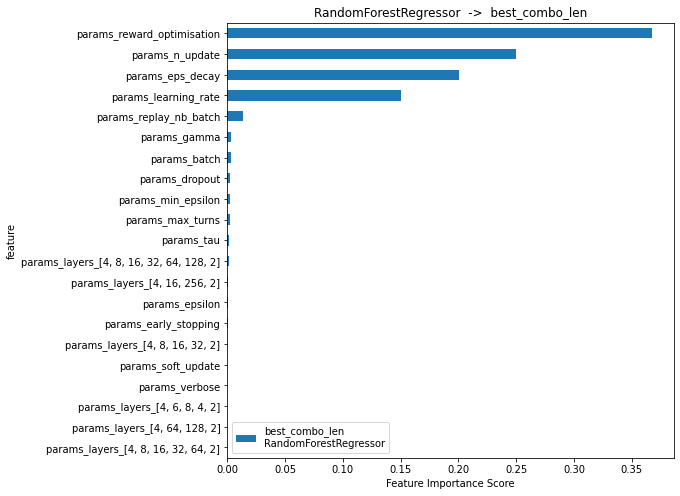

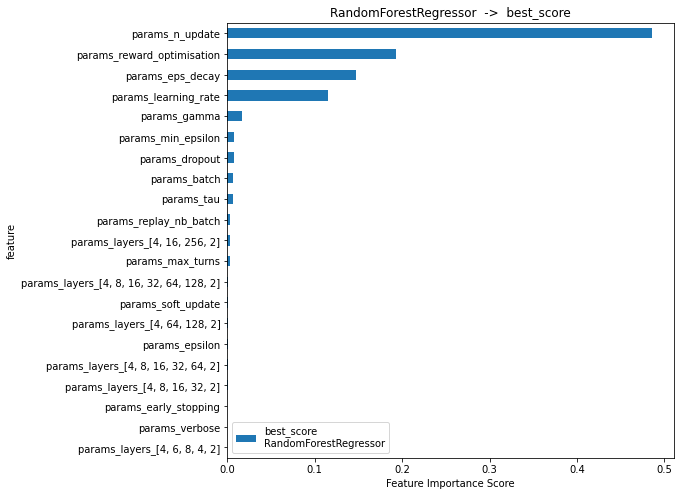

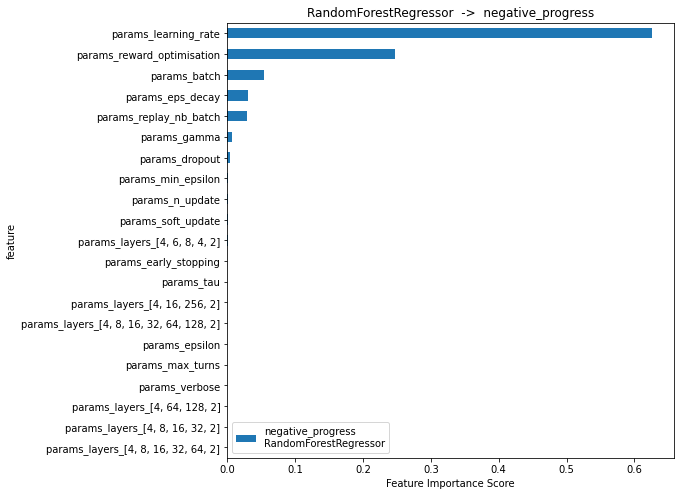

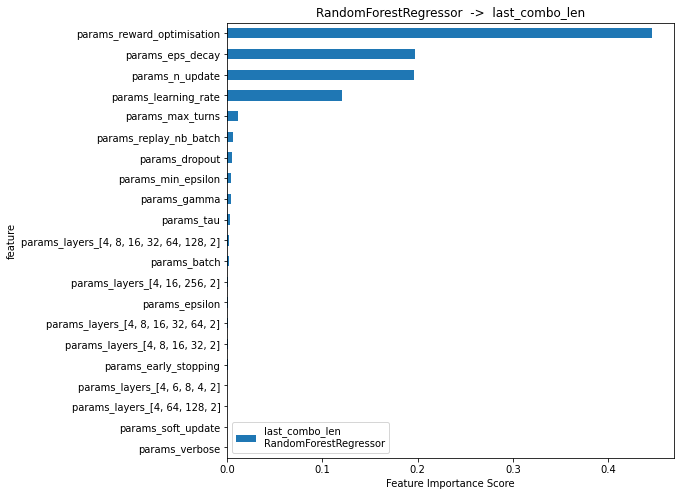

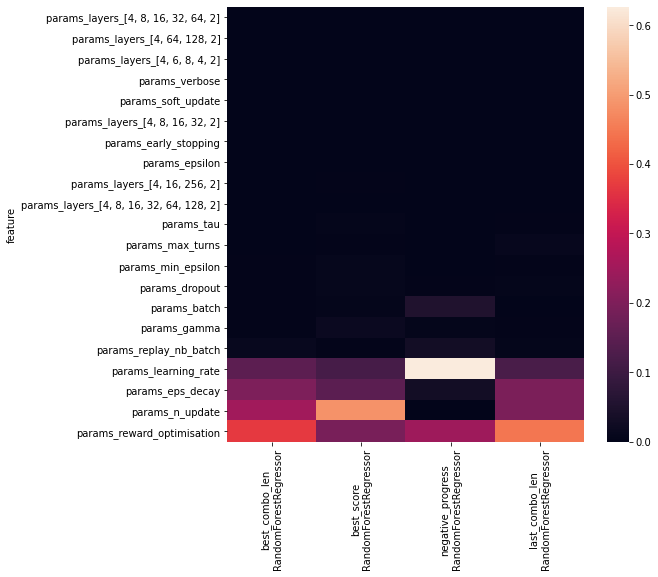

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=3, random_state=0)
df_imp = feat_imp_explo(df, hyper_parameter_list, target_list, clf)

### CART Regression 

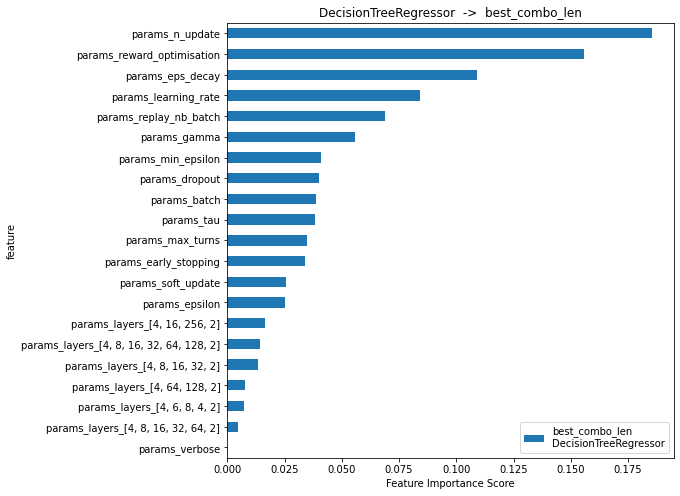

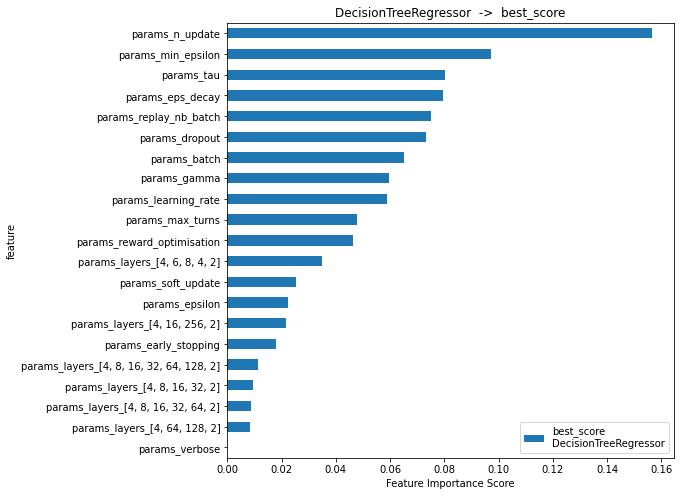

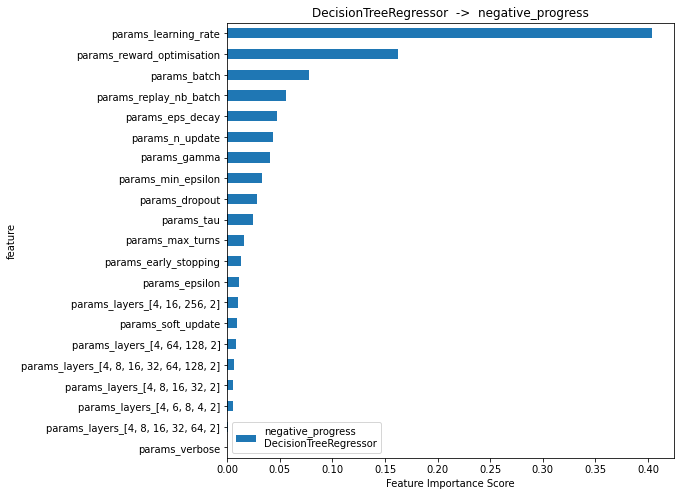

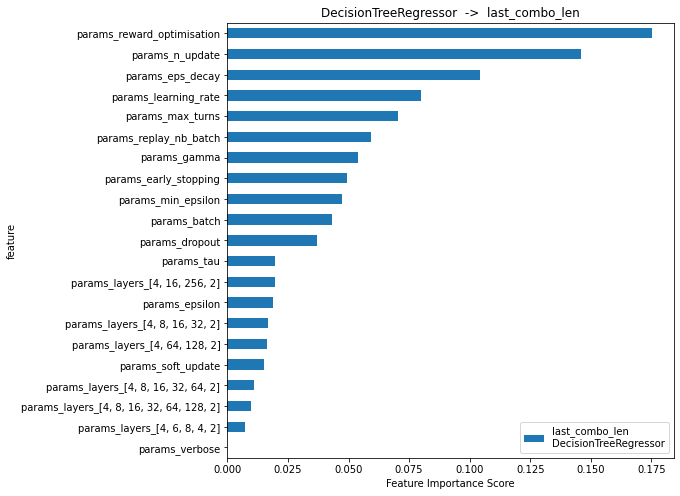

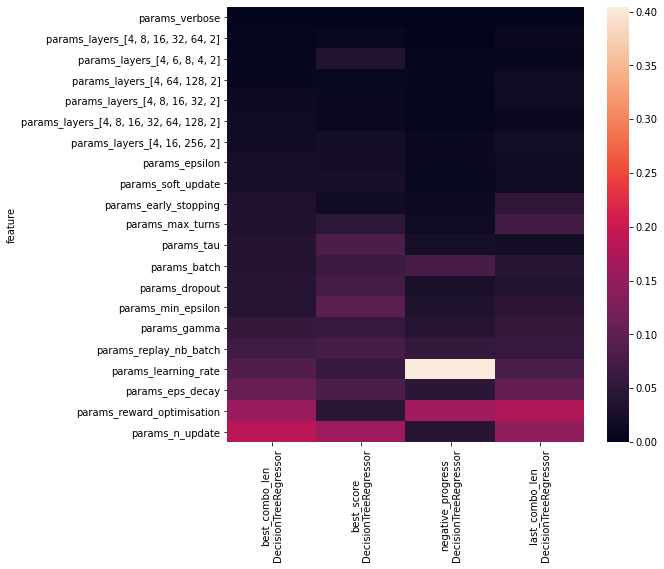

In [33]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()

df_imp = pd.concat([df_imp, feat_imp_explo(df, hyper_parameter_list, target_list, clf)], axis=1)


### XGBoost

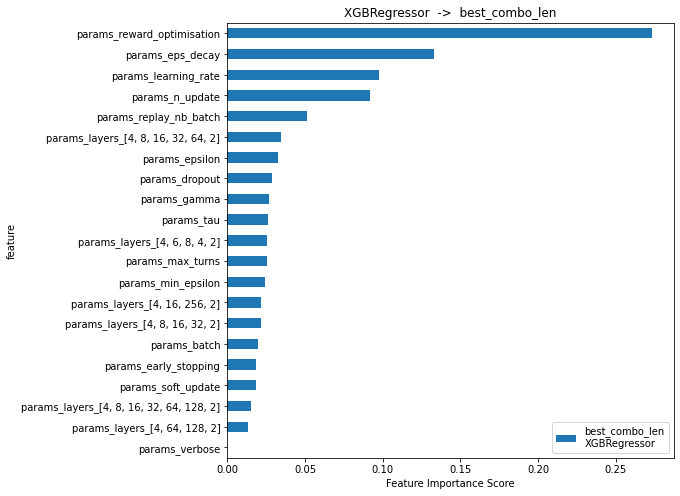

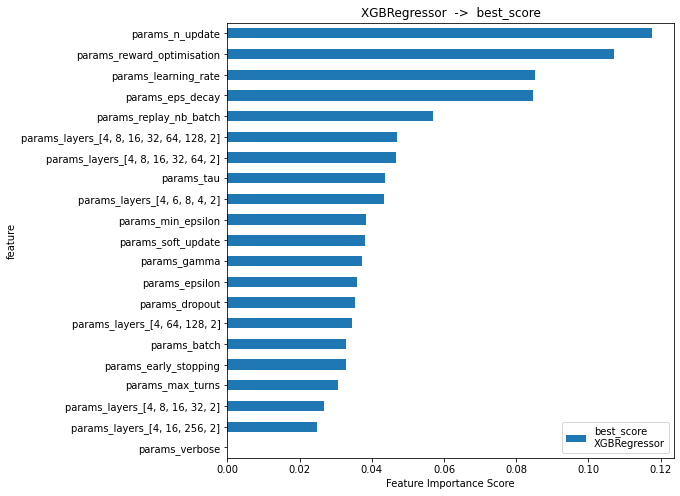

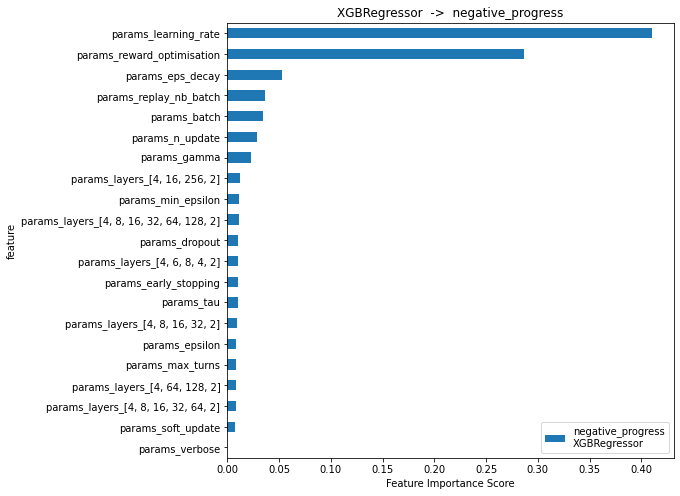

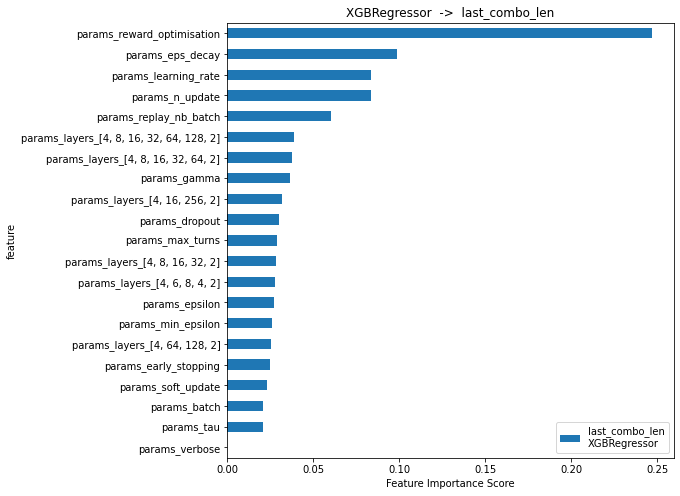

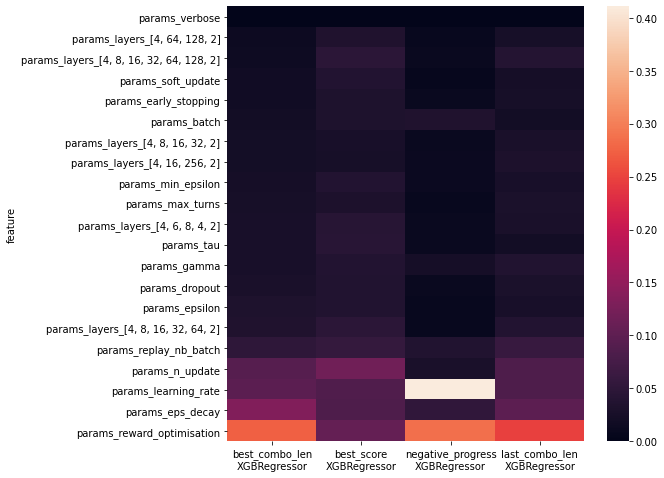

In [34]:
from xgboost import XGBRegressor

clf = XGBRegressor()

df_imp = pd.concat([df_imp, feat_imp_explo(df, hyper_parameter_list, target_list, clf)], axis=1)


## Visual Conclusion

<AxesSubplot:>

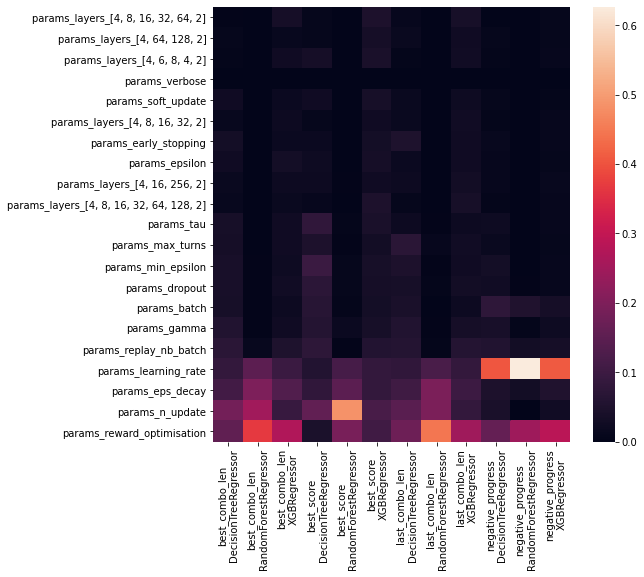

<AxesSubplot:>

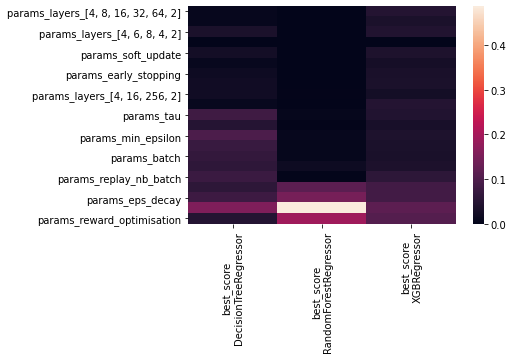

<AxesSubplot:>

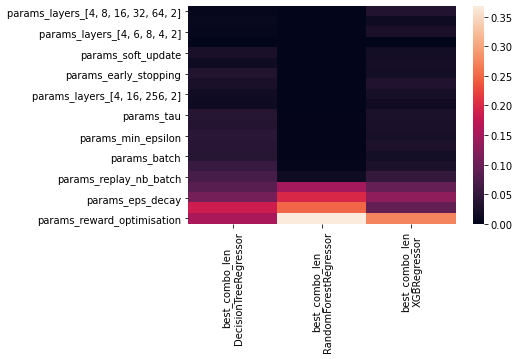

<AxesSubplot:>

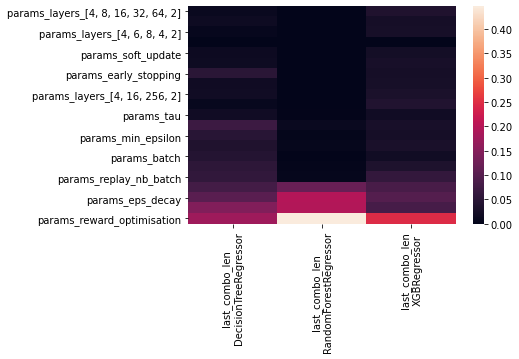

<AxesSubplot:>

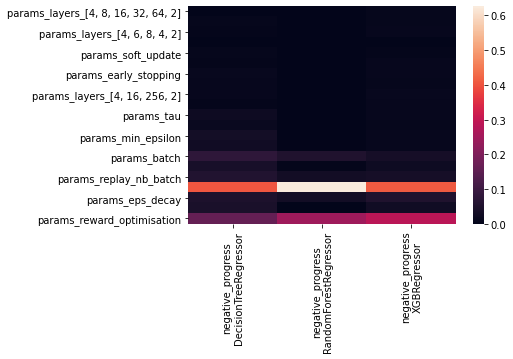

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
df_imp = df_imp.reindex(sorted(df_imp.columns), axis=1)

feat_imp_names = df_imp.columns

f_best_score = [s for s in feat_imp_names if s.startswith('best_score')]
f_best_combo = [s for s in feat_imp_names if s.startswith('best_combo')]
f_last_combo = [s for s in feat_imp_names if s.startswith('last')]
f_neg_prog = [s for s in feat_imp_names if s.startswith('negative')]

hmm = sn.heatmap(ax=ax, data=df_imp)
display(hmm)
plt.pause(0.05)

plt.clf()
hmm = sn.heatmap(data=df_imp[f_best_score])
display(hmm)
plt.pause(0.05)

plt.clf()
hmm = sn.heatmap(data=df_imp[f_best_combo])
display(hmm)
plt.pause(0.05)

plt.clf()
hmm = sn.heatmap(data=df_imp[f_last_combo])
display(hmm)
plt.pause(0.05)

plt.clf()
hmm = sn.heatmap(data=df_imp[f_neg_prog])
display(hmm)
plt.pause(0.05)



# Explo of best features

## Feature list declaration

In [36]:
df_imp['sum'] = df_imp.loc[:,df_imp.columns].sum(axis=1)
df_imp
df_imp_s = df_imp.sort_values(by=['sum'], ascending=False)


## Pair Plot

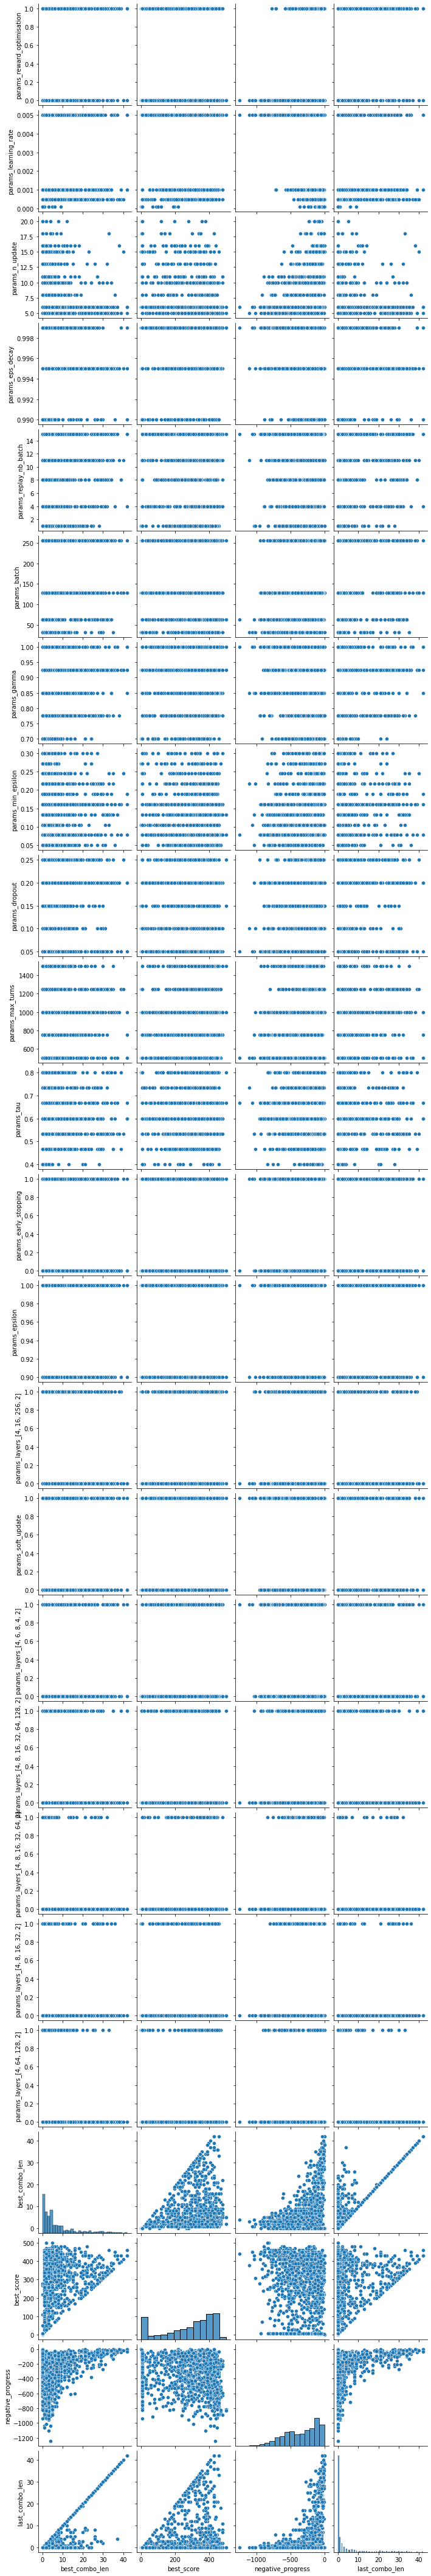

In [37]:
# params_of_interest.append('best_score')
# df_pairplot = df[params_of_interest]
params_of_interest = list(df_imp_s.index.values.tolist())
params_of_interest.remove('params_verbose')
target_list = ['best_combo_len', 'best_score', 'negative_progress', 'last_combo_len']
for i in target_list:
    params_of_interest.append(i)

sn.pairplot(data=df, 
    x_vars=target_list,
    y_vars=params_of_interest)

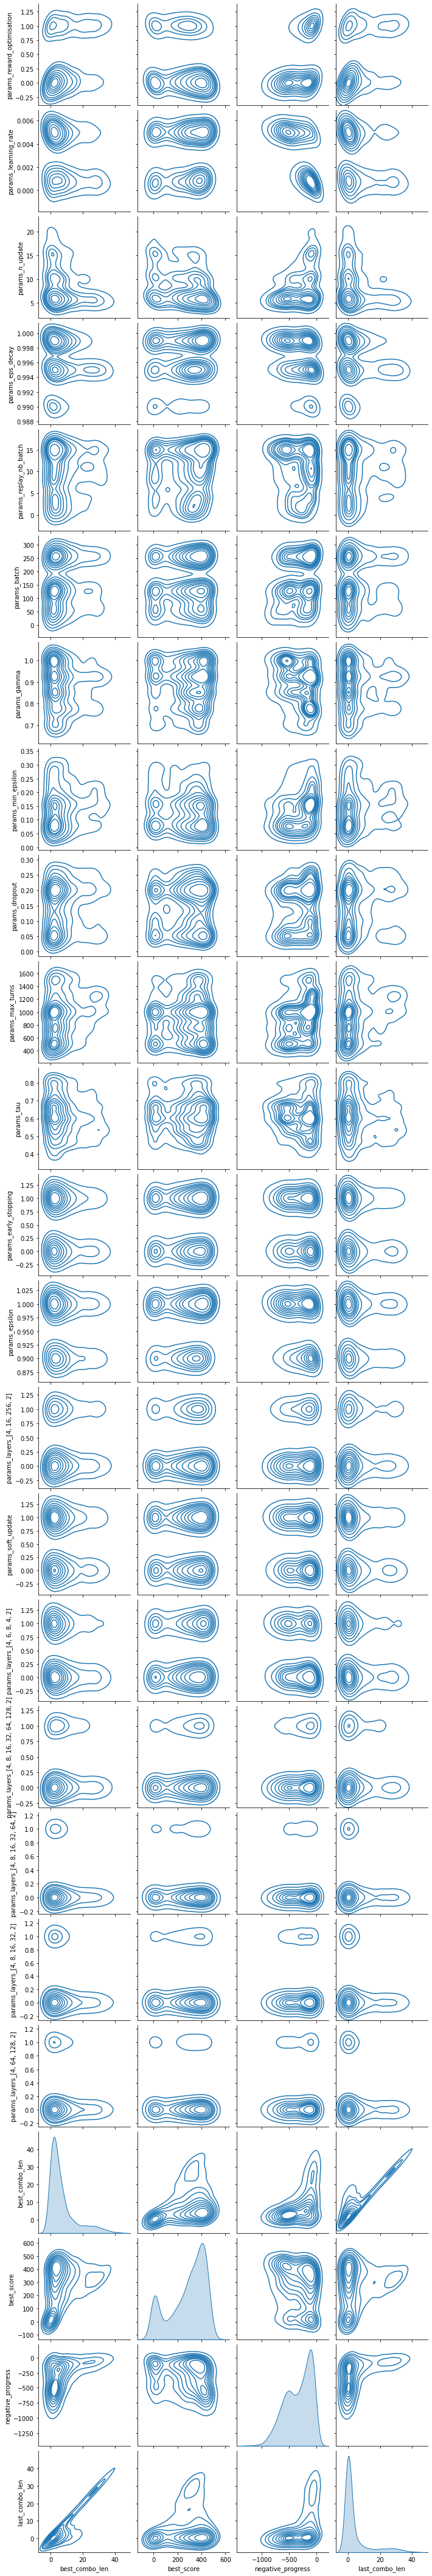

In [38]:
sn.pairplot(data=df,#.iloc[good_group_indexs], 
    x_vars=target_list,
    y_vars=params_of_interest,
    kind="kde")

In [39]:
import numpy as np
import math

# https://github.com/mwaskom/seaborn/issues/2294
res = np.var(df['best_score'])

print("Var is: ", res)
math.isclose(res, 0)

Var is:  21591.150462408954


False

In [ ]:
df.iloc[good_group_indexs]

/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipp

/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ezalos/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipp

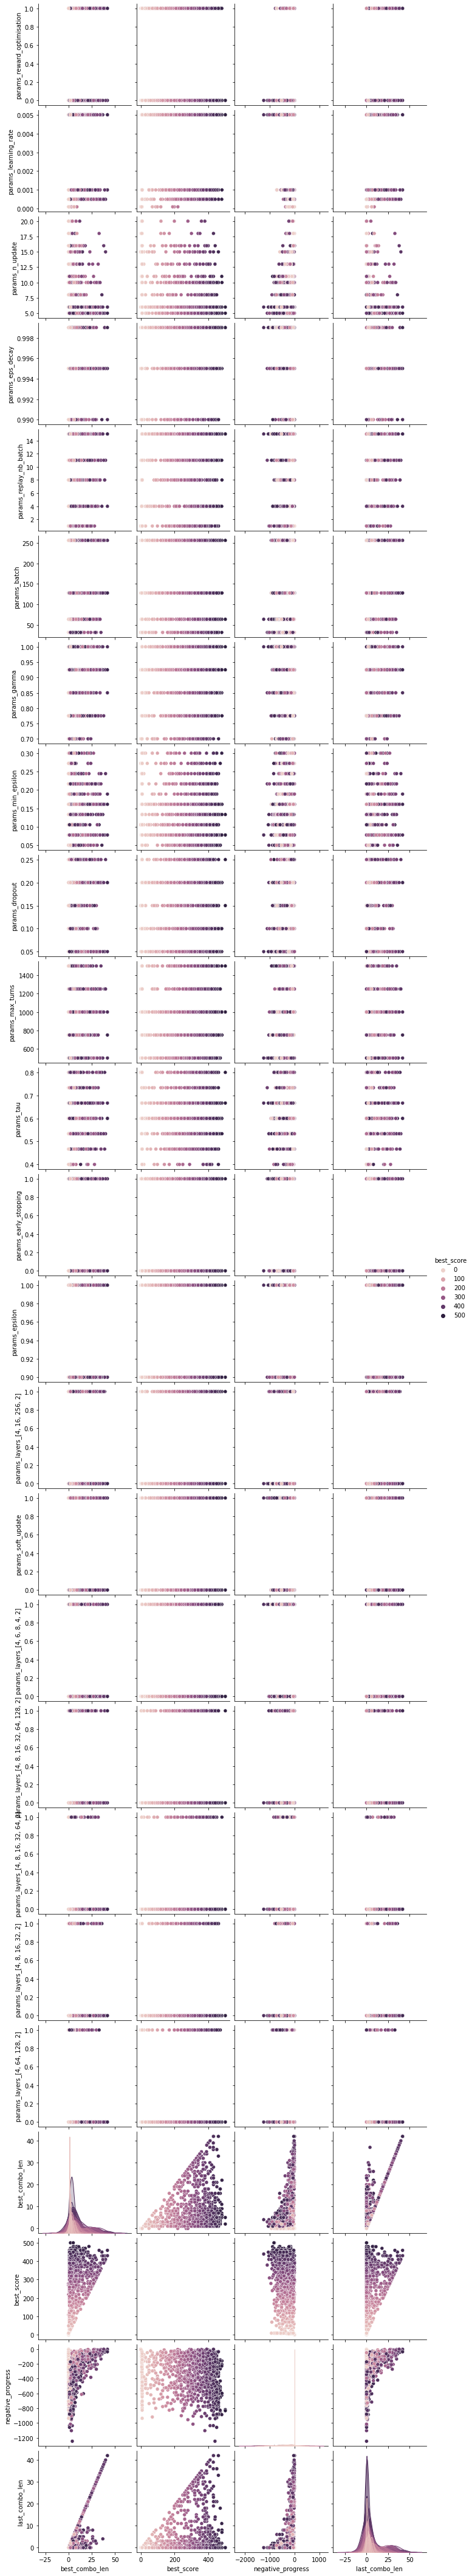

In [40]:
sn.pairplot(data=df, 
    x_vars=target_list,
    y_vars=params_of_interest,
    hue="best_score")

In [ ]:
sn.pairplot(data=df.iloc[good_group_indexs], 
    x_vars=target_list,
    y_vars=params_of_interest,
    hue="best_score")

Should explore the last graph with only the stable groups from similarity curves clustering

# Params to explore

The question:

Which parameters should be choosen to maximise best_score and minimize negative_progress ?

1. Useful insight
    1. Which variables are best correlated with best_score ?
    2. Which variables are best correlated with negative_progress ?

2. Closer look to the question
    1. The parameters are NOT independant
        1. Unfortunately, a good score for a particular variable value could be because of the interaction with another variable, which also need to be set
    2. We could study groups of params, instead of individual params ?
        1. Plotting the parameters for group from the clustering is interesting
        2. Parameters values should be ordered by best_score or negative_progress
        3. Showing them in the df is a good start, but a more visual approach could be great
    3. This approach gives an insight on good and bad association of params, and allow us to select good candidates. But it does not allow us to predict what will be the (range of) best combinations of params.

3. Answering the question
    1. From the range of interesting params, a new GridSearch could investigate them more closely.
    2. It does not give the answer, but it put us closer to it.
    3. This whole process can be done recursively, i guess


# Next things to look for:

 - Which params differ from top and bottom of custom variables (especially negative progress) ?
   - The values in the middle might be misleading, better to only look to the top 100
   - Making mean (with associated std) of these two 100 top might show some insight, especially if they greatly differ between the 2 groups
 - Need to create custom params_var to explore neural_net impact:
   - Number of connexions
   - Number of Neurones
   - Factor/ratio of the 2 ? Check if it has mathematical meaning before...
   - BIAS vs WEIGHTS + depth
 - Would be great to know which params have influence on which params.
   - Because previous conclusions might not work if we select best params independently when they could be harmful together, or at least dumb as fuck (ie: soft_update = False & tau=Something)
   
